<a href="https://colab.research.google.com/github/lailasaummi/Virtual-Internship-id-x-partners/blob/main/Laila_Awalia_Saummi_VIX_ID_X_Partners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Risk Prediction for a Lending Company**

Company provided the dataset that contains of good and bad credit scoring issued from 2007 until 2014.

Objectives:
1.   Built a model with provided technology solution to predict the probability of a borrower defaulting a loan
2.   Developed WOE, IV and Train-Test to get the best model
3.   Deployed the Machine Learning model using pickle



### Data Resources and References

*   Loan Dataset 2007-2014 (format .csv) https://drive.google.com/file/d/1r17UjbuxkcCwGbXOUkr3wcG8UmjvEzCD/view?usp=sharing
*   Loan Dataset Dictionary (sheet: LoanStats) https://docs.google.com/spreadsheets/d/1iT1JNOBwU4l616_rnJpo0iny7blZvNBs/edit#gid=1001272030
*   Credit Risk Modelling in Python https://medium.com/analytics-vidhya/credit-risk-modelling-in-python-3ab4b00f6505
*   Credit Risk Modelling Git https://github.com/yineme/Credit_Risk_modelling.git
*   Uji Multikolinearitas pada Analisis Regresi https://lab_adrk.ub.ac.id/id/uji-multikolinearitas-pada-analisis-regresi/




## **Data Preparation**

### Import Libraries to Process the Dataset

In [1]:
import pandas as pd
import numpy as np

### Load Dataset Dictionary
Understand the representation of each column in dataset

In [2]:
# Import dataset from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Description = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/LCDataDictionary.xlsx', 'LoanStats').dropna()
Description.style.set_properties(subset=['Description'], **{'width' :'850px'})

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,revol_bal,Description,Translate
0,addr_state,The state provided by the borrower in the loan application,Negara yang disediakan oleh peminjam dalam aplikasi pinjaman
1,annual_inc,The self-reported annual income provided by the borrower during registration.,Penghasilan tahunan yang dilaporkan sendiri yang disediakan oleh peminjam selama pendaftaran.
2,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration,Penghasilan tahunan yang dilaporkan sendiri gabungan yang disediakan oleh co-peminjam selama pendaftaran
3,application_type,The combined self-reported annual income provided by the co-borrowers during registration,Penghasilan tahunan yang dilaporkan sendiri gabungan yang disediakan oleh co-peminjam selama pendaftaran
4,collection_recovery_fee,post charge off collection fee,Biaya pengumpulan biaya penagihan
5,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections,Jumlah koleksi dalam 12 bulan tidak termasuk koleksi medis
6,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years,Jumlah 30+ hari insiden kenakalan yang lewat dalam file kredit peminjam selama 2 tahun terakhir
7,desc,Loan description provided by the borrower,Deskripsi pinjaman yang disediakan oleh peminjam
8,dti,Loan description provided by the borrower,Deskripsi pinjaman yang disediakan oleh peminjam
9,dti_joint,"A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income","Rasio yang dihitung menggunakan total pembayaran bulanan peminjam bersama atas total kewajiban utang, tidak termasuk hipotek dan pinjaman LC yang diminta, dibagi oleh pendapatan bulanan yang dilaporkan sendiri oleh co-peminjam yang dilaporkan sendiri"


### Load Dataset

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/loan_data_2007_2014.csv', low_memory = False)

In [5]:
# Check dimension of dataset
data.shape

(466285, 75)

## **Data Cleaning**

### Drop Inconsistent Columns

``Unnamed: 0``, ``id``, ``member_id``, ``url``, ``title``, ``zip_code``, ``emp_title`` and ``policy_code`` grade columns are considered as identifiers and can not be used in this modelling. The ``sub_grade`` columns also contains same information as grade columns. 

Columns that contains of future information like ``next_pymnt_d``, ``recoveries``, ``collection_recovery_fee``, ``total_rec_prncp`` and ``total_rec_late_fee`` grade columns can not be used because those events aren't yet occur. The sub_grade columns also contains same information as grade columns. Then we can drop them.

In [6]:
data.drop(['Unnamed: 0','id','member_id', 'sub_grade', 'url', 'title','zip_code', 'emp_title', 'policy_code'], axis = 1, inplace = True)

In [7]:
data.shape

(466285, 66)

In [8]:
data.drop(['next_pymnt_d', 'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee'], axis = 1, inplace = True)

In [9]:
data.shape

(466285, 61)

### Filling Columns Contain of Missing Values

In [10]:
# Expand the output display of columns that have missing values
pd.options.display.max_rows = None
data.isnull().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
desc                           340302
purpose                             0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util  

Loan Dataset Dictionary tell us about the description of ``total_rev_hi_lim`` is total revolving high credit/ credit limit. ``total_rev_hi_lim`` have missing values but we need it for credit risk prediction modelling analysis. We can recover it with ``funded_amnt`` column (The total amount committed to that loan at that point in time).

In [11]:
data['total_rev_hi_lim'].fillna(data['funded_amnt'],inplace = True)

In [12]:
data['total_rev_hi_lim'].isnull().sum()

0

Loan Dataset Dictionary tell us about the description of ``annual_inc`` is The self-reported annual income provided by the borrower during registration. ``annual_inc`` have missing values but we need it for credit risk prediction modelling analysis. We can recover it with fill the missing values with ``annual_inc`` mean values.

In [13]:
data.annual_inc.fillna(data.annual_inc.mean(),inplace=True)

In [14]:
data.annual_inc.isnull().sum()

0

We can consider the other columns with missing values that we need for credit risk prediction modelling with fill them by zero.

In [15]:
for i in list(['acc_now_delinq','total_acc','pub_rec','open_acc','inq_last_6mths','delinq_2yrs','emp_length']):
    data[i].fillna(0,inplace = True)

In [16]:
data.loc[:,['acc_now_delinq','total_acc','pub_rec','open_acc','inq_last_6mths','delinq_2yrs','emp_length']].isnull().sum()

acc_now_delinq    0
total_acc         0
pub_rec           0
open_acc          0
inq_last_6mths    0
delinq_2yrs       0
emp_length        0
dtype: int64

### Drop Columns Contain of Missing Values

In [17]:
# Display columns that have greater than 70% of missing values
missing_values = data.isnull().mean()
missing_values[missing_values>0.7]

desc                           0.729815
mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
annual_inc_joint               1.000000
dti_joint                      1.000000
verification_status_joint      1.000000
open_acc_6m                    1.000000
open_il_6m                     1.000000
open_il_12m                    1.000000
open_il_24m                    1.000000
mths_since_rcnt_il             1.000000
total_bal_il                   1.000000
il_util                        1.000000
open_rv_12m                    1.000000
open_rv_24m                    1.000000
max_bal_bc                     1.000000
all_util                       1.000000
inq_fi                         1.000000
total_cu_tl                    1.000000
inq_last_12m                   1.000000
dtype: float64

In [18]:
missing_values = ['desc', 'mths_since_last_record', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

In [19]:
data.drop(columns=missing_values, inplace=True, axis=1)

In [20]:
data.shape

(466285, 41)

Create a new variable called ``good_bad`` will help us for scoring the loan whether is good or bad loan

good --> 1<br>
bad --> 0

In [21]:
# Create a new column based on 'loan_status' column that will be our target variable
data['good_bad'] = np.where(data.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)',
                                                                       'Does not meet the credit policy. Status:Charged Off']), 0, 1)
# Drop the original 'loan_status' column
data.drop(columns = ['loan_status'], inplace = True)

In [22]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,...,Jan-15,171.62,Jan-16,0.0,INDIVIDUAL,0.0,NaN,NaN,5000.0,1
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,...,Apr-13,119.66,Sep-13,0.0,INDIVIDUAL,0.0,NaN,NaN,2500.0,0
2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,...,Jun-14,649.91,Jan-16,0.0,INDIVIDUAL,0.0,NaN,NaN,2400.0,1
3,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,...,Jan-15,357.48,Jan-15,0.0,INDIVIDUAL,0.0,NaN,NaN,10000.0,1
4,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,...,Jan-16,67.79,Jan-16,0.0,INDIVIDUAL,0.0,NaN,NaN,3000.0,1


In [23]:
data.shape

(466285, 41)

### Import Plotting Libraries

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

### Drop Multicollinear Features from Dataset

If there is multicollinearity in dataset, then the predictive power of a variable that is strongly correlated with other variables not reliable and unstable. So we should drop them.

In [25]:
# Drop another missing values column
data.dropna(inplace=True)

In [26]:
data.shape

(190618, 41)

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5]), <a list of 14 Text major ticklabel objects>)

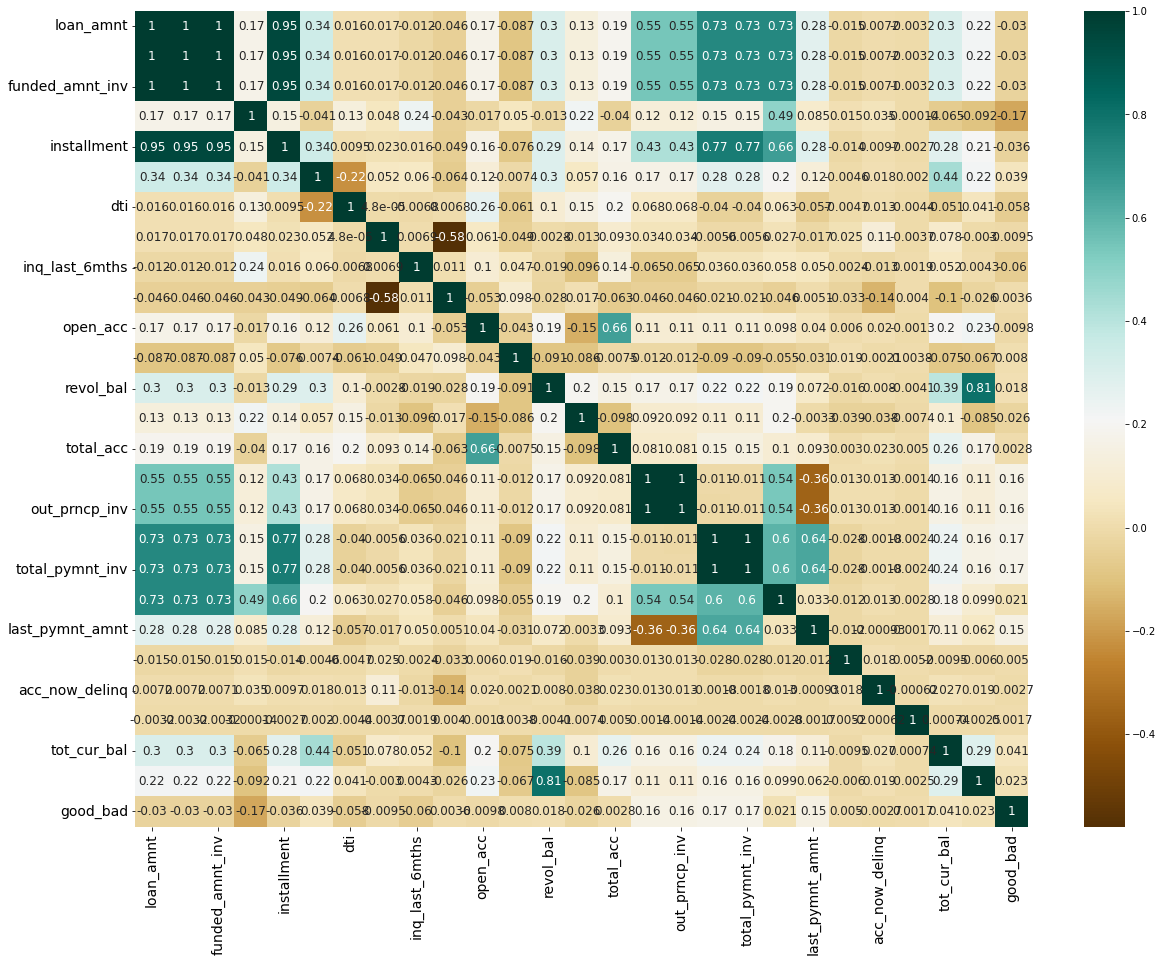

In [27]:
# Correlation matrix showing correlation co-effiecients 
corr_matrix = data.corr()
heatMap=sns.heatmap(corr_matrix, annot=True,  cmap="BrBG", annot_kws={'size':12})
heatmap=plt.gcf()
heatmap.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


In [28]:
# Drop multicollinear features 
data.drop(columns=['loan_amnt', 'revol_bal', 'funded_amnt', 'funded_amnt_inv', 'installment',  'total_pymnt_inv',  'out_prncp_inv',  'total_acc'], inplace=True)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 <a list of 19 Text major ticklabel objects>)

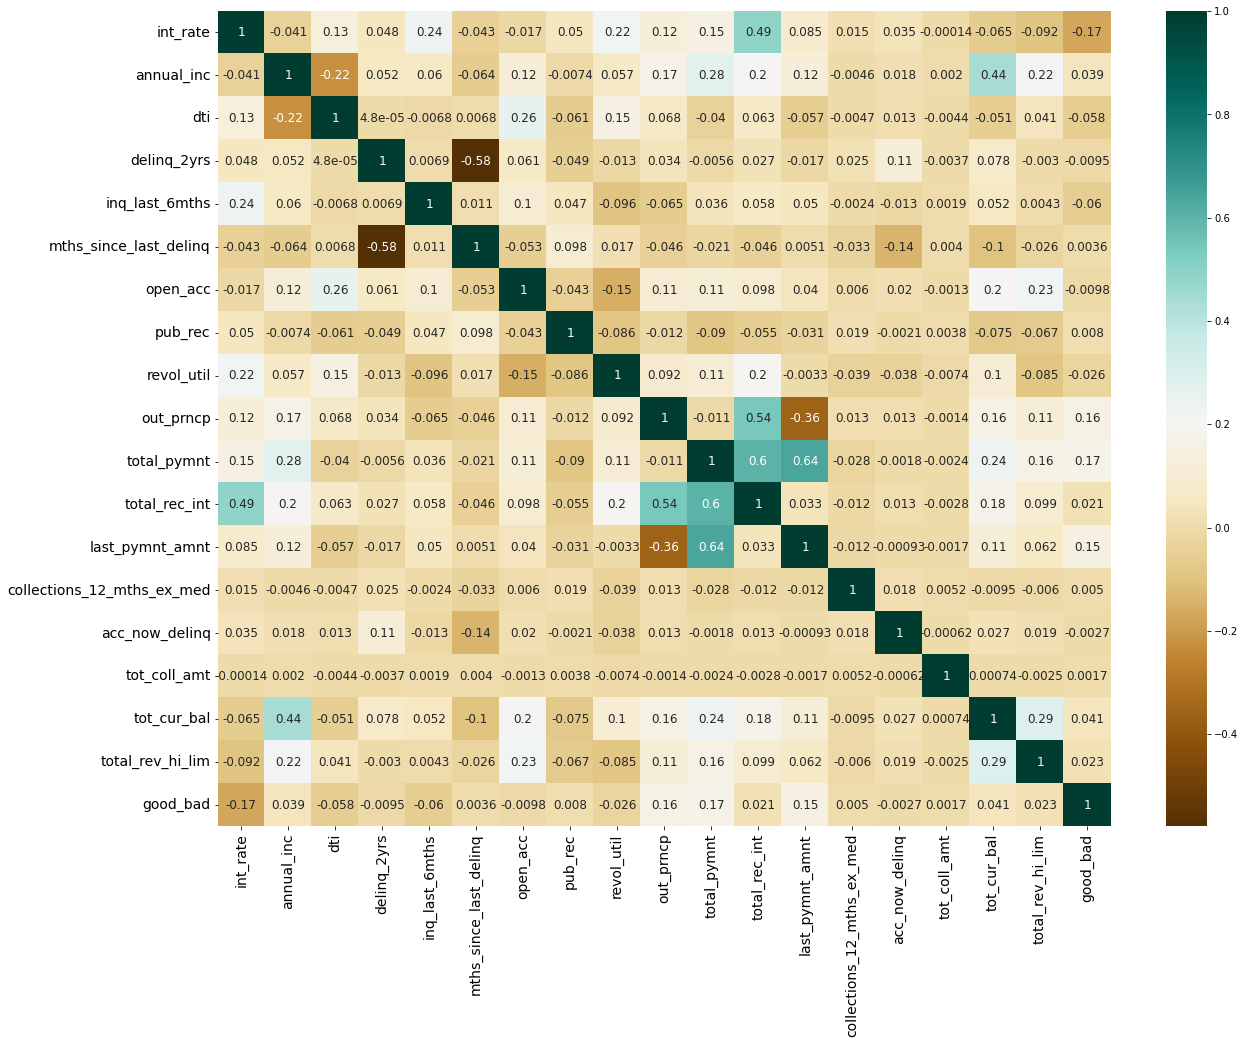

In [29]:
corr_matrix = data.corr()
heatMap=sns.heatmap(corr_matrix, annot=True,  cmap="BrBG", annot_kws={'size':12})
heatmap=plt.gcf()
heatmap.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [30]:
data.shape

(190618, 33)

In [31]:
data.describe()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad
count,190618.000000,1.906180e+05,190618.000000,190618.000000,190618.000000,190618.000000,190618.000000,190618.000000,190618.000000,190618.000000,190618.000000,190618.000000,190618.000000,190618.000000,190618.000000,1.906180e+05,1.906180e+05,1.906180e+05,190618.000000
mean,14.454201,7.765769e+04,17.462402,0.633099,0.822336,33.853193,11.697269,0.194562,56.434158,5258.085071,11102.724611,2655.656932,3095.006714,0.016509,0.009758,3.319317e+02,1.483168e+05,2.722117e+04,0.900786
std,4.246514,5.996936e+04,7.820867,1.100489,1.058534,21.725505,4.982298,0.564152,22.588499,6619.645360,7951.305102,2456.122530,5582.036726,0.149372,0.106938,2.107498e+04,1.583077e+05,4.177441e+04,0.298950
min,6.000000,3.000000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,35.690000,0.000000,0.010000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+02,0.000000
25%,11.670000,4.900000e+04,11.580000,0.000000,0.000000,15.000000,8.000000,0.000000,40.100000,0.000000,5405.410000,1026.240000,317.730000,0.000000,0.000000,0.000000e+00,3.145625e+04,1.230000e+04,1.000000
50%,14.160000,6.675000e+04,16.990000,0.000000,0.000000,30.000000,11.000000,0.000000,57.200000,2639.400000,9016.101794,1903.090000,532.045000,0.000000,0.000000,0.000000e+00,9.525100e+04,2.050000e+04,1.000000
75%,17.140000,9.200000e+04,23.010000,1.000000,1.000000,49.000000,14.000000,0.000000,73.800000,8787.652500,14523.037500,3395.180000,2888.907500,0.000000,0.000000,0.000000e+00,2.224748e+05,3.380000e+04,1.000000
max,26.060000,7.500000e+06,39.990000,29.000000,7.000000,188.000000,84.000000,21.000000,892.300000,31898.770000,56087.909920,21840.000000,36170.140000,20.000000,5.000000,9.152545e+06,8.000078e+06,9.999999e+06,1.000000


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190618 entries, 42537 to 466284
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   term                        190618 non-null  object 
 1   int_rate                    190618 non-null  float64
 2   grade                       190618 non-null  object 
 3   emp_length                  190618 non-null  object 
 4   home_ownership              190618 non-null  object 
 5   annual_inc                  190618 non-null  float64
 6   verification_status         190618 non-null  object 
 7   issue_d                     190618 non-null  object 
 8   pymnt_plan                  190618 non-null  object 
 9   purpose                     190618 non-null  object 
 10  addr_state                  190618 non-null  object 
 11  dti                         190618 non-null  float64
 12  delinq_2yrs                 190618 non-null  float64
 13  earliest_c

### Converting Data Types of Continous Variables

In [33]:
# Display unique value of 'emp_length' column
data['emp_length'].unique()

array(['10+ years', '2 years', '4 years', '7 years', '6 years', '5 years',
       '8 years', '3 years', '1 year', 0, '< 1 year', '9 years'],
      dtype=object)

In [34]:
# Convert 'emp_length' datatype to numerical column and assign missing values to zero
def emp_length_convert(df, column):
    df[column] = df[column].str.replace('\+ years', '')
    df[column] = df[column].str.replace('< 1 year', str(0))
    df[column] = df[column].str.replace(' years', '')
    df[column] = df[column].str.replace(' year', '')
    df[column] = pd.to_numeric(df[column])
    df[column].fillna(value = 0, inplace = True)
    
emp_length_convert(data, 'emp_length')

data['emp_length'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


array([10.,  2.,  4.,  7.,  6.,  5.,  8.,  3.,  1.,  0.,  9.])

In [35]:
data['emp_length'].dtype

dtype('float64')

In [36]:
# Convert 'term' datatype to numerical column
def term_numeric(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(' months', ''))
    
term_numeric(data, 'term')

In [37]:
data['term'].dtype

dtype('int64')

In [38]:
# Modified date columns 

def date_columns(df, column):
    # Current month
    today_date = pd.to_datetime('2020-08-01')
    # Convert to datetime format
    df[column] = pd.to_datetime(df[column], format = "%b-%y")
    # Calculate the difference in months and add to a new column
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    # Make any resulting -ve values to be equal to the max date
    df['mths_since_' + column] = df['mths_since_' + column].apply(lambda x: df['mths_since_' + column].max() if x < 0 else x)
    # Drop the original date column
    df.drop(columns = [column], inplace = True)
    

date_columns(data, 'issue_d')
date_columns(data, 'last_pymnt_d')
date_columns(data, 'last_credit_pull_d')
date_columns(data, 'earliest_cr_line')

### Concatenate Discrete Variables

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190618 entries, 42537 to 466284
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   term                           190618 non-null  int64  
 1   int_rate                       190618 non-null  float64
 2   grade                          190618 non-null  object 
 3   emp_length                     190618 non-null  float64
 4   home_ownership                 190618 non-null  object 
 5   annual_inc                     190618 non-null  float64
 6   verification_status            190618 non-null  object 
 7   pymnt_plan                     190618 non-null  object 
 8   purpose                        190618 non-null  object 
 9   addr_state                     190618 non-null  object 
 10  dti                            190618 non-null  float64
 11  delinq_2yrs                    190618 non-null  float64
 12  inq_last_6mths            

In [40]:
# Create dummy variables for categorical columns
pd.get_dummies(data['grade'],prefix = 'grade', prefix_sep = ":")

In [41]:
data_dummies = [pd.get_dummies(data['grade'],prefix = 'grade', prefix_sep = ":"),
                    pd.get_dummies(data['home_ownership'],prefix = 'home_ownership', prefix_sep = ":"),
                    pd.get_dummies(data['verification_status'],prefix = 'verification_status', prefix_sep = ":"),
                    pd.get_dummies(data['good_bad'],prefix = 'good_bad', prefix_sep = ":"),
                    pd.get_dummies(data['purpose'],prefix = 'purpose', prefix_sep = ":"),
                    pd.get_dummies(data['addr_state'],prefix = 'addr_state', prefix_sep = ":"),
                    pd.get_dummies(data['initial_list_status'],prefix = 'initial_list_status', prefix_sep = ":")]

In [42]:
data_dummies = pd.concat(data_dummies,axis = 1)

In [43]:
type(data_dummies)

pandas.core.frame.DataFrame

In [44]:
data = pd.concat([data,data_dummies],axis = 1)

In [45]:
data.columns.values

array(['term', 'int_rate', 'grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'pymnt_plan', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_util',
       'initial_list_status', 'out_prncp', 'total_pymnt', 'total_rec_int',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'good_bad',
       'mths_since_issue_d', 'mths_since_last_pymnt_d',
       'mths_since_last_credit_pull_d', 'mths_since_earliest_cr_line',
       'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'home_ownership:ANY', 'home_ownership:MORTGAGE',
       'home_ownership:NONE', 'home_ownership:OTHER',
       'home_ownership:OWN', 'home_ownership:RENT',
       'verification_status:Not Verified',
       'verification_status:Source Verified',
       'verification_sta

In [46]:
# Check for missing values columns again 
missing_values = data.isnull().sum()
missing_values[missing_values>0]/len(data)

Series([], dtype: float64)

In [47]:
preprocess_data = data

In [48]:
# Check for any missing values
missing = preprocess_data.isnull().sum()
missing[missing>0]

Series([], dtype: int64)

## **Supervised Learning**

### Weight of Evidence (WOE) and Information Value (IV)

Weight of evidence (WOE) can determine which categories should be binned. Information value (IV) can determine which variables are useful in the logistic regression which is the algorithm of supervised learning. 

In [49]:
# Calculate WOE and IV

def iv_woe(data, target, bins=10, show_woe=False):
    
    # Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    # Extract Column Names
    cols = data.columns
    
    # Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        # Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF
iv, woe = iv_woe(preprocess_data, target='good_bad', bins=20)

Information value of term is 0.031513
Information value of int_rate is 0.336433
Information value of grade is 0.271188
Information value of emp_length is 0.00912
Information value of home_ownership is 0.018308
Information value of annual_inc is 0.039656
Information value of verification_status is 0.034596
Information value of pymnt_plan is 0.00029
Information value of purpose is 0.02678
Information value of addr_state is 0.010041
Information value of dti is 0.041092
Information value of delinq_2yrs is 0.001036
Information value of inq_last_6mths is 0.040339
Information value of mths_since_last_delinq is 0.002222
Information value of open_acc is 0.00393
Information value of pub_rec is 0.000485
Information value of revol_util is 0.008719
Information value of initial_list_status is 0.010552
Information value of out_prncp is 0.707456
Information value of total_pymnt is 0.52082
Information value of total_rec_int is 0.013928
Information value of last_pymnt_amnt is 1.475938
Information value 

In [50]:
print(iv)

                              Variable            IV
0                                 term  3.151265e-02
0                             int_rate  3.364327e-01
0                                grade  2.711879e-01
0                           emp_length  9.119980e-03
0                       home_ownership  1.830829e-02
0                           annual_inc  3.965628e-02
0                  verification_status  3.459613e-02
0                           pymnt_plan  2.897177e-04
0                              purpose  2.677966e-02
0                           addr_state  1.004118e-02
0                                  dti  4.109217e-02
0                          delinq_2yrs  1.036485e-03
0                       inq_last_6mths  4.033864e-02
0               mths_since_last_delinq  2.222301e-03
0                             open_acc  3.929695e-03
0                              pub_rec  4.854729e-04
0                           revol_util  8.718736e-03
0                  initial_list_status  1.0552

The rule of dumb is for variables with less than 0.2 of information value are not useful for prediction and if greater than 0.5 have a suspicious predictive power. 

Therefore, the following variables will not be included: 
``out_prncp``, ``last_pymnt_amnt``, ``delinq_2yrs``, ``mths_since_last_delinq``, ``open_acc``, ``pub_rec``, ``total_acc``, ``collections_12_mths_ex_med``, ``acc_now_delinq``, ``tot_coll_amt`` and ``mths_since_last_pymnt_d``

In [51]:
# Drop columns with low information value
preprocess_data.drop(columns=[ 'pymnt_plan', 'last_pymnt_amnt', 'revol_util', 'delinq_2yrs', 'mths_since_last_delinq', 'open_acc', 'pub_rec',  'collections_12_mths_ex_med', 'acc_now_delinq',
                              'tot_coll_amt', 'mths_since_last_pymnt_d', 'emp_length', 'application_type'], axis=1, inplace=True)

In [52]:
preprocess_data.shape

(190618, 101)

In [53]:
# Create dummy variables for categorical columns
data_dummies1 = [pd.get_dummies(preprocess_data['grade'], prefix='grade', prefix_sep=':'),
               pd.get_dummies(preprocess_data['home_ownership'], prefix='home_ownership', prefix_sep=':'),
               pd.get_dummies(preprocess_data['verification_status'], prefix='verification_status', prefix_sep=':'),
                pd.get_dummies(preprocess_data['purpose'], prefix='purpose', prefix_sep=':'),
                pd.get_dummies(preprocess_data['addr_state'], prefix='addr_state', prefix_sep=':'),
                pd.get_dummies(preprocess_data['initial_list_status'], prefix='initial_list_status', prefix_sep=':')
                               
               ]


In [54]:
# Turn 'data_dummies' into dataframe

categorical_dummies = pd.concat(data_dummies1, axis=1)

In [55]:
categorical_dummies.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
42537,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
42538,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
42539,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
42541,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
42543,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [56]:
# Concatinate preprocess_data variable with categorical_dummies

preprocess_data = pd.concat([preprocess_data, categorical_dummies], axis=1)

In [57]:
preprocess_data.shape

(190618, 180)

In [58]:
preprocess_data.columns

Index(['term', 'int_rate', 'grade', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'addr_state', 'dti', 'inq_last_6mths',
       ...
       'addr_state:TX', 'addr_state:UT', 'addr_state:VA', 'addr_state:VT',
       'addr_state:WA', 'addr_state:WI', 'addr_state:WV', 'addr_state:WY',
       'initial_list_status:f', 'initial_list_status:w'],
      dtype='object', length=180)

In [59]:
# Calculate WOE of categorical features

def woe_categorical(df, cat_feature, good_bad_df):
    df = pd.concat([df[cat_feature], good_bad_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df


# Plot WOE values 
# Set seaborn as default style of graphs
sns.set()
# Plot WoE across categories that takes 2 arguments: a dataframe and a number.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)    


In [60]:
# Separate data into target and features
X= preprocess_data.drop(columns='good_bad', axis=1)
y=preprocess_data['good_bad']
df_grade = woe_categorical(X, 'grade', y)
df_grade


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,1451,0.749139,0.007612,1087.0,364.0,0.006331,0.019247,-1.111964,NaN,NaN,0.271188
1,F,5977,0.786682,0.031356,4702.0,1275.0,0.027384,0.067418,-0.900945,0.037544,0.211019,0.271188
2,E,16309,0.827457,0.085559,13495.0,2814.0,0.078594,0.148794,-0.638275,0.040775,0.262671,0.271188
3,D,35064,0.865332,0.183949,30342.0,4722.0,0.176709,0.249683,-0.345687,0.037875,0.292588,0.271188
4,C,55704,0.901731,0.292228,50230.0,5474.0,0.292535,0.289446,0.010616,0.036399,0.356302,0.271188
5,B,55312,0.934842,0.290172,51708.0,3604.0,0.301143,0.190567,0.457581,0.033112,0.446965,0.271188
6,A,20801,0.968319,0.109124,20142.0,659.0,0.117305,0.034846,1.213852,0.033476,0.756271,0.271188


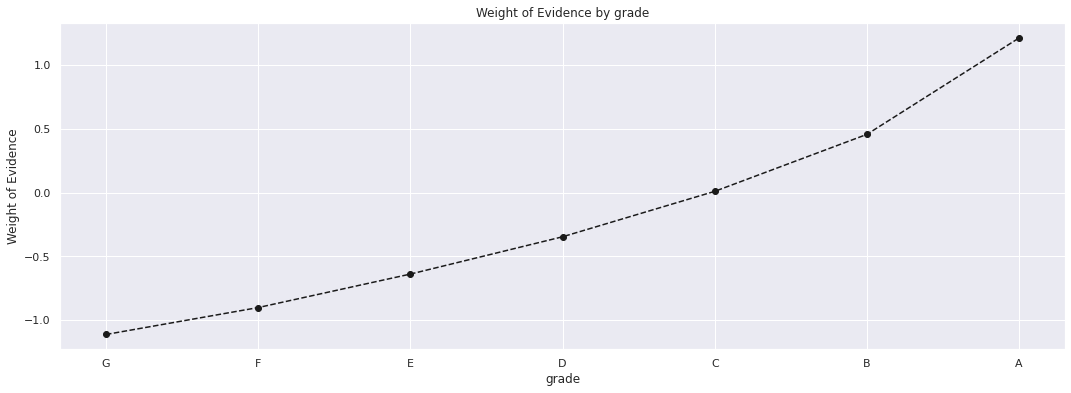

In [61]:
plot_by_woe(df_grade)

From this graph we can see that grades variable have different WOE from another variable. We will keep each grade as a feature.

In [62]:
# Analyze 'home_ownership' variable

df_home = woe_categorical(X, 'home_ownership', y)
df_home

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NONE,32,0.812500,0.000168,26.0,6.0,0.000151,0.000317,-0.739650,NaN,NaN,inf
1,RENT,69092,0.885153,0.362463,61157.0,7935.0,0.356173,0.419575,-0.163826,0.072653,0.575824,inf
2,OWN,17260,0.900753,0.090548,15547.0,1713.0,0.090544,0.090577,-0.000366,0.015600,0.163461,inf
3,OTHER,22,0.909091,0.000115,20.0,2.0,0.000116,0.000106,0.096598,0.008338,0.096964,inf
4,MORTGAGE,104211,0.911180,0.546701,94955.0,9256.0,0.553009,0.489425,0.122144,0.002089,0.025546,inf
5,ANY,1,1.000000,0.000005,1.0,0.0,0.000006,0.000000,inf,0.088820,inf,inf


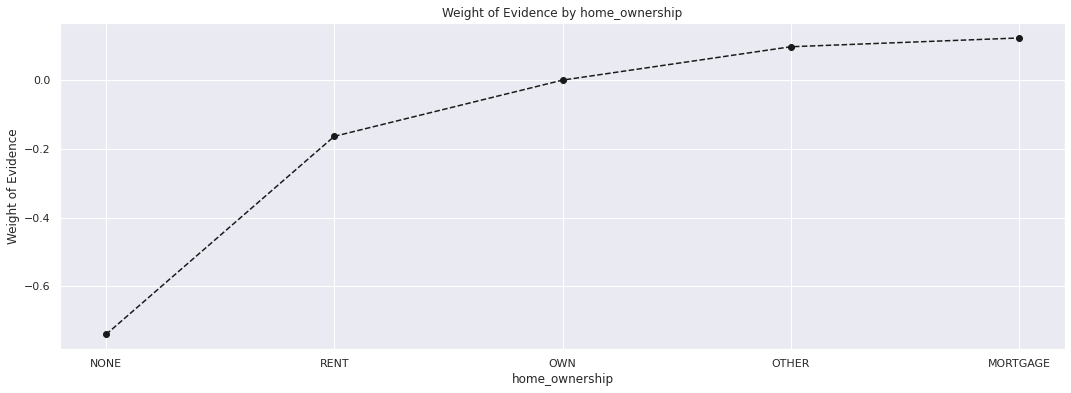

In [63]:
# Plot df_home WOE
plot_by_woe(df_home)

OTHER, NONE and ANY have very few observations and should be combined with the category with high risk of default which is RENT.

In [64]:
# Analyze 'verification_status'

veri_df = woe_categorical(X, 'verification_status', y)
veri_df

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,67650,0.881094,0.354898,59606.0,8044.0,0.347140,0.425338,-0.203157,NaN,NaN,0.034596
1,Source Verified,65964,0.902735,0.346053,59548.0,6416.0,0.346802,0.339255,0.022001,0.021641,0.225158,0.034596
2,Not Verified,57004,0.921900,0.299048,52552.0,4452.0,0.306058,0.235406,0.262463,0.019165,0.240462,0.034596


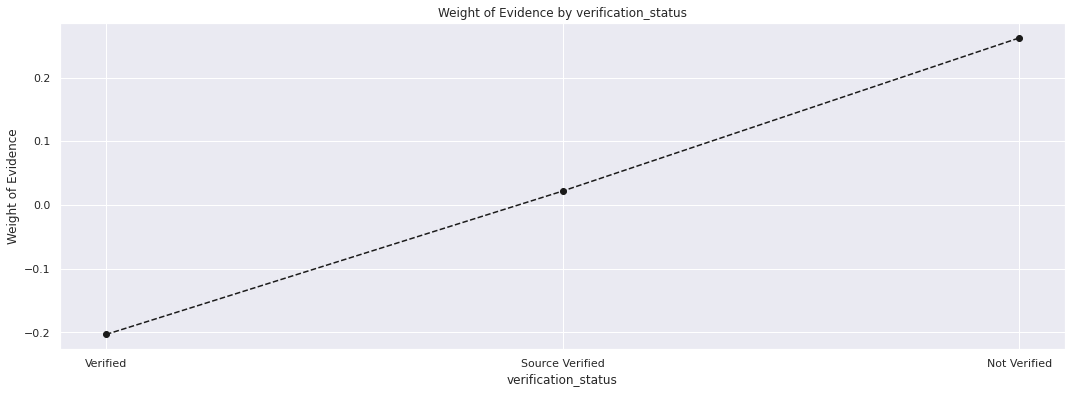

In [65]:
plot_by_woe(veri_df)

This variable has different WOE values and can be used to separate variables.

In [66]:
# Analyze 'purpose'  variable
pur_df = woe_categorical(X, 'purpose', y)
pur_df

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,small_business,2108,0.820209,0.011059,1729.0,379.0,0.010070,0.020040,-0.688225,NaN,NaN,0.02678
1,moving,1035,0.844444,0.005430,874.0,161.0,0.005090,0.008513,-0.514311,0.024236,0.173914,0.02678
2,wedding,418,0.851675,0.002193,356.0,62.0,0.002073,0.003278,-0.458191,0.007230,0.056120,0.02678
3,renewable_energy,110,0.863636,0.000577,95.0,15.0,0.000553,0.000793,-0.360160,0.011962,0.098030,0.02678
4,house,805,0.875776,0.004223,705.0,100.0,0.004106,0.005288,-0.252959,0.012140,0.107201,0.02678
5,medical,1792,0.882254,0.009401,1581.0,211.0,0.009208,0.011157,-0.192032,0.006478,0.060927,0.02678
6,other,8875,0.886648,0.046559,7869.0,1006.0,0.045828,0.053194,-0.149038,0.004393,0.042994,0.02678
7,debt_consolidation,117121,0.895971,0.614428,104937.0,12184.0,0.611143,0.644247,-0.052751,0.009323,0.096288,0.02678
8,home_improvement,11880,0.906481,0.062324,10769.0,1111.0,0.062718,0.058746,0.065424,0.010511,0.118175,0.02678
9,major_purchase,3155,0.910935,0.016551,2874.0,281.0,0.016738,0.014858,0.119118,0.004454,0.053694,0.02678


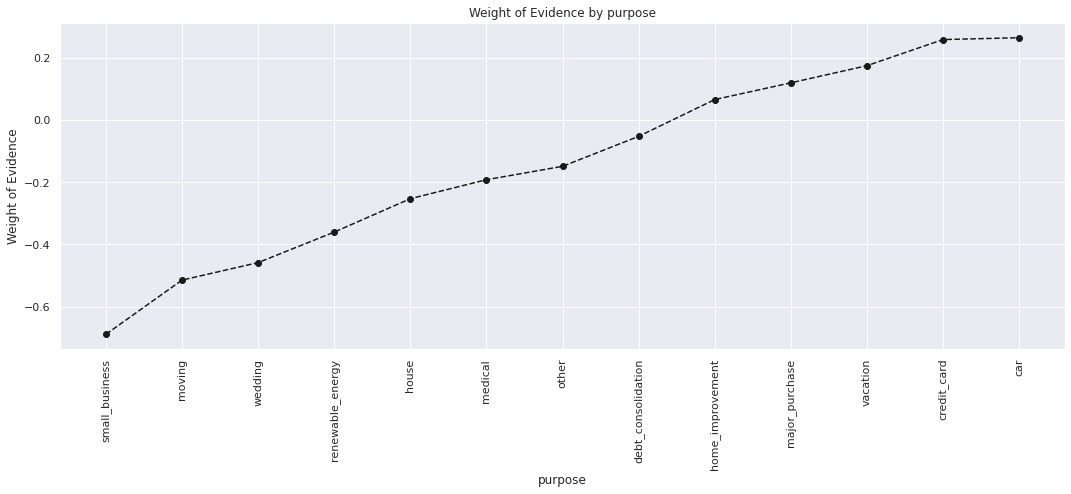

In [67]:
plot_by_woe(pur_df, 90)

The following  categories wil be combined together:
1. educational, renewable_energy, moving
2. other,house, medical
3. weeding, vacation
4. debt_consolidation
5. home_improvement, major purchase
6. car, credit_card


In [71]:
# Analyze 'addr_state' WOE

addr_df = woe_categorical(X, 'addr_state', y)
addr_df

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,HI,1118,0.872987,0.005865,976.0,142.0,0.005684,0.007508,-0.278352,NaN,NaN,inf
1,AL,2492,0.887640,0.013073,2212.0,280.0,0.012882,0.014805,-0.139124,0.014653,0.139227,inf
2,OK,1615,0.887926,0.008472,1434.0,181.0,0.008351,0.009571,-0.136261,0.000285,0.002863,inf
3,LA,2268,0.888448,0.011898,2015.0,253.0,0.011735,0.013378,-0.131002,0.000522,0.005259,inf
4,VA,5932,0.889582,0.031120,5277.0,655.0,0.030733,0.034634,-0.119509,0.001134,0.011493,inf
5,NV,2751,0.890949,0.014432,2451.0,300.0,0.014274,0.015863,-0.105518,0.001367,0.013991,inf
6,NY,15681,0.891461,0.082264,13979.0,1702.0,0.081412,0.089996,-0.100235,0.000512,0.005283,inf
7,NC,5240,0.891603,0.027490,4672.0,568.0,0.027209,0.030034,-0.098766,0.000142,0.001469,inf
8,FL,12739,0.892770,0.066830,11373.0,1366.0,0.066235,0.072229,-0.086632,0.001167,0.012134,inf
9,MD,4776,0.893216,0.025055,4266.0,510.0,0.024845,0.026967,-0.081966,0.000446,0.004666,inf


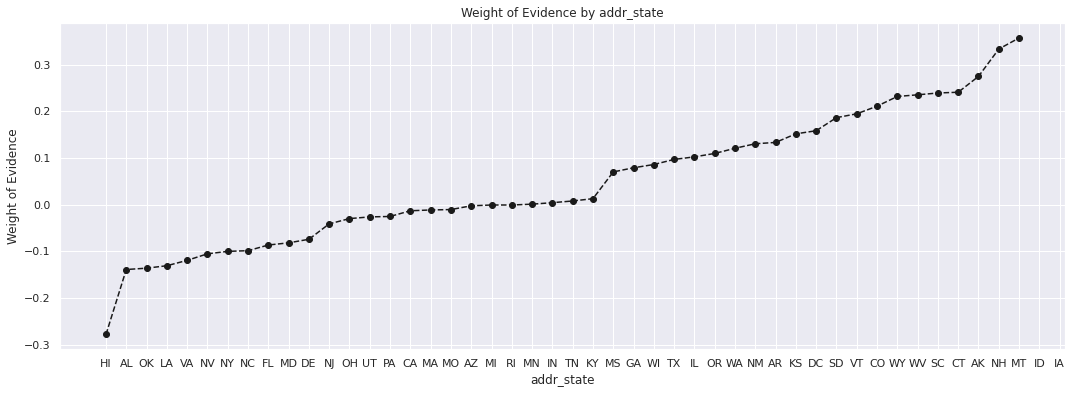

In [72]:
plot_by_woe(addr_df)

The states NE, IA, ME and ID have low observations and this may because of their extreme WOE. We will plot the graph again without including these categories and see if there are any changes.

In [73]:
# Dataframe excluding low observations for 'addr_state' column
data1 =addr_df.iloc[2:44, :]
data2 =addr_df.iloc[45:49, :]
low_data_woe = pd.concat([data1, data2], axis=0)

In [74]:
low_data_woe

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
2,OK,1615,0.887926,0.008472,1434.0,181.0,0.008351,0.009571,-0.136261,0.000285,0.002863,inf
3,LA,2268,0.888448,0.011898,2015.0,253.0,0.011735,0.013378,-0.131002,0.000522,0.005259,inf
4,VA,5932,0.889582,0.031120,5277.0,655.0,0.030733,0.034634,-0.119509,0.001134,0.011493,inf
5,NV,2751,0.890949,0.014432,2451.0,300.0,0.014274,0.015863,-0.105518,0.001367,0.013991,inf
6,NY,15681,0.891461,0.082264,13979.0,1702.0,0.081412,0.089996,-0.100235,0.000512,0.005283,inf
7,NC,5240,0.891603,0.027490,4672.0,568.0,0.027209,0.030034,-0.098766,0.000142,0.001469,inf
8,FL,12739,0.892770,0.066830,11373.0,1366.0,0.066235,0.072229,-0.086632,0.001167,0.012134,inf
9,MD,4776,0.893216,0.025055,4266.0,510.0,0.024845,0.026967,-0.081966,0.000446,0.004666,inf
10,DE,528,0.893939,0.002770,472.0,56.0,0.002749,0.002961,-0.074360,0.000723,0.007606,inf
11,NJ,7614,0.897032,0.039944,6830.0,784.0,0.039777,0.041455,-0.041316,0.003092,0.033044,inf


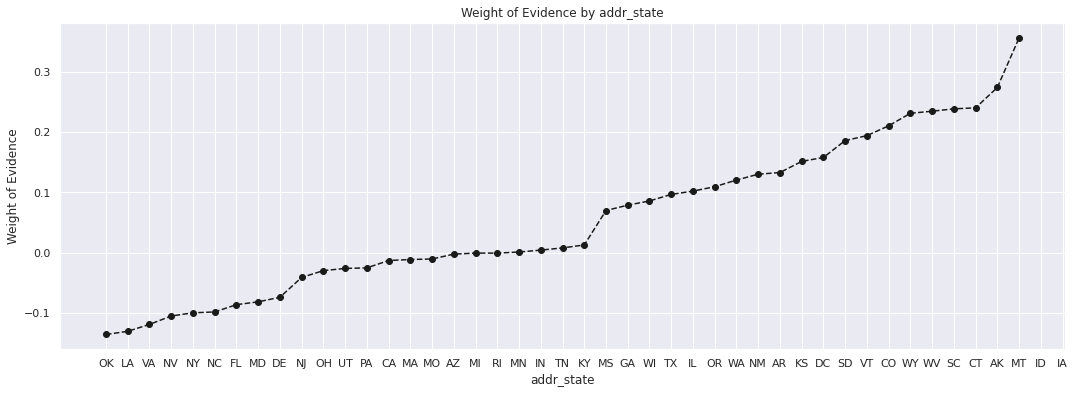

In [75]:
# Plot 'addr_state' excluding states with low observations
plot_by_woe(low_data_woe)

To decide which categories will combined, we use both WOE and the number of observations. Categories with similar WOE but significantly different observations will not be combine together. It is because the number of observations could influence the WOE values. Also, categories with similar WOE and observations greater than 5% can be combined together to form a new category. 

The categories will combined together, such as:

1. NE, IA, NV, HI, FL, AL
2. NY
3. LA, NM, OK, NC, MO, MD, NJ, VA
4. CA
5. AZ, MI, UT, TN, AR, PA
6. RI, OH, KY, DE, MN, SD, MA, IN
7. GA, WA
8. WI, OR
9. TX
10. IL, CT,MT
11. CO, SC
12. KS, VT, AK, MS
13. NH, WV, WY, DC




In [76]:
# Analyze 'initial_list_status' WOE 

init_list_df = woe_categorical( X, 'initial_list_status', y)
init_list_df

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,111352,0.893105,0.584163,99449.0,11903.0,0.579182,0.629389,-0.083133,NaN,NaN,0.010552
1,w,79266,0.911576,0.415837,72257.0,7009.0,0.420818,0.370611,0.127047,0.018471,0.21018,0.010552


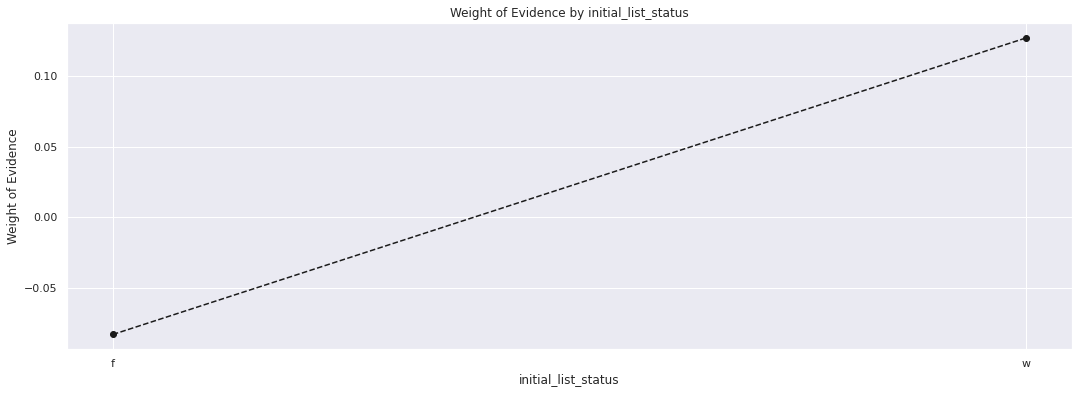

In [77]:
plot_by_woe(init_list_df)

This variable has significantly different WOE values and categories should be kept as separate variables.

### Analyze Continous Variables

In [78]:
# Function to calculate WOE for continous variables
def woe_continous(df, cat_feature, good_bad_df):
    df = pd.concat([df[cat_feature], good_bad_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df


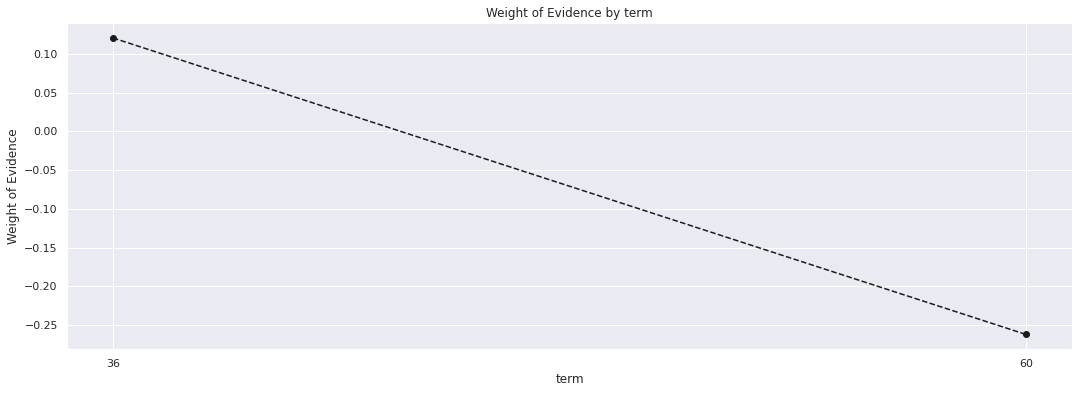

In [79]:
# Analyze 'term' WOE
plot_by_woe(woe_continous(X,'term', y ))

In [80]:
X['mths_since_issue_d'].unique()

array([80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92.,
       93., 94., 95., 96., 68., 69., 70., 71., 72., 73., 74., 75., 76.,
       77., 78., 79.])

In [81]:
# Fine classing by create a new variable

X['mths_since_issue_d_factor'] = pd.cut(X['mths_since_issue_d'], 10)


In [82]:
# Analyze 'mths_since_iss_df' WOE
mths_since_iss_df = woe_continous(X, 'mths_since_issue_d_factor', y)
mths_since_iss_df

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(67.972, 70.8]",38563,0.937194,0.202305,36141.0,2422.0,0.210482,0.128067,0.496847,NaN,NaN,0.086058
1,"(70.8, 73.6]",29359,0.916278,0.154020,26901.0,2458.0,0.156669,0.129970,0.186828,0.020916,0.310019,0.086058
2,"(73.6, 76.4]",27608,0.905716,0.144834,25005.0,2603.0,0.145627,0.137637,0.056424,0.010562,0.130404,0.086058
3,"(76.4, 79.2]",24062,0.898845,0.126232,21628.0,2434.0,0.125959,0.128701,-0.021534,0.006871,0.077958,0.086058
4,"(79.2, 82.0]",20400,0.891324,0.107020,18183.0,2217.0,0.105896,0.117227,-0.101655,0.007521,0.080121,0.086058
5,"(82.0, 84.8]",11198,0.884712,0.058746,9907.0,1291.0,0.057697,0.068264,-0.168163,0.006612,0.066508,0.086058
6,"(84.8, 87.6]",14263,0.866718,0.074825,12362.0,1901.0,0.071995,0.100518,-0.333740,0.017993,0.165577,0.086058
7,"(87.6, 90.4]",9643,0.866743,0.050588,8358.0,1285.0,0.048676,0.067946,-0.333527,0.000025,0.000213,0.086058
8,"(90.4, 93.2]",10587,0.856522,0.055540,9068.0,1519.0,0.052811,0.080319,-0.419288,0.010221,0.085761,0.086058
9,"(93.2, 96.0]",4935,0.841540,0.025889,4153.0,782.0,0.024187,0.041349,-0.536256,0.014982,0.116968,0.086058


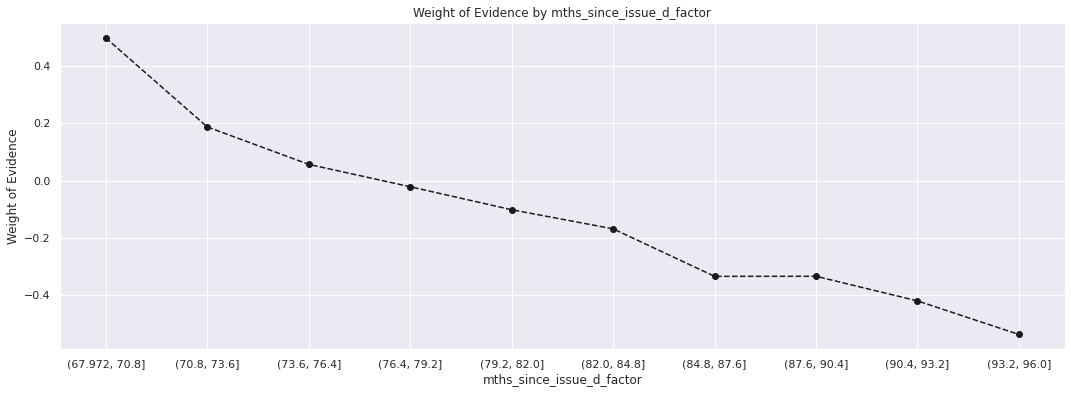

In [83]:
plot_by_woe(mths_since_iss_df)

The following categories will be created based on their WOE and number of observations:
1. (67.97, 70.8)
2. (70.8, 73.6)
3. (73.6- 76.4)
4. (76.4.- 79.2)
5. (79.2-82)
6. 82-84
7. 84-90.4
8. 90.4-96

In [84]:
# Analyze interest rate WOE
X['int_rate_factor'] = pd.cut(X['int_rate'], 10)

In [85]:
int_rate_df = woe_continous(X, 'int_rate_factor',y)
int_rate_df

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.98, 8.006]",13383,0.972353,0.070208,13013.0,370.0,0.075787,0.019564,1.354214,NaN,NaN,0.322677
1,"(8.006, 10.012]",15378,0.959683,0.080674,14758.0,620.0,0.085949,0.032783,0.963834,0.012670,0.390380,0.322677
2,"(10.012, 12.018]",26802,0.945153,0.140606,25332.0,1470.0,0.147531,0.077728,0.640819,0.014529,0.323015,0.322677
3,"(12.018, 14.024]",37010,0.921643,0.194158,34110.0,2900.0,0.198654,0.153342,0.258893,0.023511,0.381926,0.322677
4,"(14.024, 16.03]",36590,0.897158,0.191955,32827.0,3763.0,0.191181,0.198974,-0.039952,0.024485,0.298845,0.322677
5,"(16.03, 18.036]",23742,0.869093,0.124553,20634.0,3108.0,0.120171,0.164340,-0.313026,0.028065,0.273074,0.322677
6,"(18.036, 20.042]",18141,0.847638,0.095169,15377.0,2764.0,0.089554,0.146151,-0.489793,0.021455,0.176767,0.322677
7,"(20.042, 22.048]",8962,0.819014,0.047015,7340.0,1622.0,0.042747,0.085766,-0.696308,0.028624,0.206515,0.322677
8,"(22.048, 24.054]",5930,0.786509,0.031109,4664.0,1266.0,0.027163,0.066942,-0.901976,0.032504,0.205668,0.322677
9,"(24.054, 26.06]",4680,0.780128,0.024552,3651.0,1029.0,0.021263,0.054410,-0.939573,0.006381,0.037597,0.322677


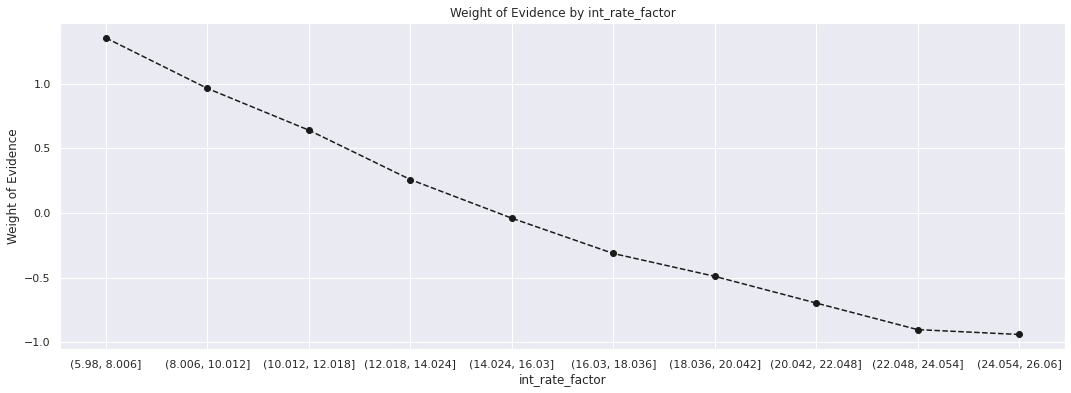

In [86]:
plot_by_woe(int_rate_df)

This graph shows that only the last two categories will be combined. That is:
1. (22.048, 26) 

In [87]:
# Analyze 'tot_rec_int' WOE
X['total_rec_int_factor'] = pd.cut(X['total_rec_int'], 20)
rec_int_df = woe_continous(X, 'total_rec_int_factor', y)
rec_int_df

,total_rec_int_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-21.84, 1092.0]",51768,0.888309,0.271580,45986.0,5782.0,0.267818,0.305732,-0.132400,NaN,NaN,inf
1,"(1092.0, 2184.0]",55628,0.902963,0.291830,50230.0,5398.0,0.292535,0.285427,0.024597,0.014653,0.156997,inf
2,"(2184.0, 3276.0]",33197,0.906980,0.174155,30109.0,3088.0,0.175352,0.163283,0.071313,0.004017,0.046717,inf
3,"(3276.0, 4368.0]",17559,0.902557,0.092116,15848.0,1711.0,0.092297,0.090472,0.019978,0.004422,0.051335,inf
4,"(4368.0, 5460.0]",10975,0.909613,0.057576,9983.0,992.0,0.058140,0.052453,0.102929,0.007056,0.082951,inf
5,"(5460.0, 6552.0]",7141,0.904355,0.037462,6458.0,683.0,0.037611,0.036115,0.040593,0.005258,0.062336,inf
6,"(6552.0, 7644.0]",4748,0.909646,0.024908,4319.0,429.0,0.025153,0.022684,0.103335,0.005291,0.062742,inf
7,"(7644.0, 8736.0]",3211,0.906260,0.016845,2910.0,301.0,0.016948,0.015916,0.062811,0.003386,0.040524,inf
8,"(8736.0, 9828.0]",2180,0.910092,0.011436,1984.0,196.0,0.011555,0.010364,0.108769,0.003832,0.045958,inf
9,"(9828.0, 10920.0]",1447,0.917761,0.007591,1328.0,119.0,0.007734,0.006292,0.206319,0.007669,0.097550,inf


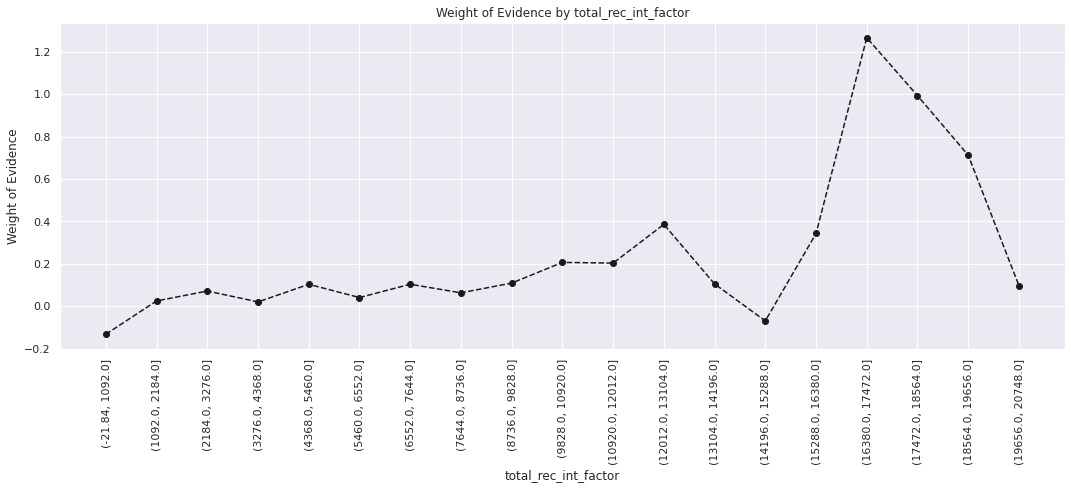

In [88]:
plot_by_woe(rec_int_df, 90)

In [89]:
# Analyze 'total_revol_hi_lim' WOE
X['total_rev_hi_lim_factor'] = pd.cut(X['total_rev_hi_lim'], 100)
revol_hi_df = woe_continous(X, 'total_rev_hi_lim_factor', y)
revol_hi_df

,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9899.899, 100098.99]",187276,0.900062,0.982468,168560.0,18716.0,0.981678,0.989636,-0.008074,NaN,NaN,inf
1,"(100098.99, 200097.98]",2818,0.941448,0.014783,2653.0,165.0,0.015451,0.008725,0.571514,0.041386,0.579588,inf
2,"(200097.98, 300096.97]",366,0.942623,0.001920,345.0,21.0,0.002009,0.001110,0.593035,0.001175,0.021521,inf
3,"(300096.97, 400095.96]",107,0.915888,0.000561,98.0,9.0,0.000571,0.000476,0.181756,0.026735,0.411279,inf
4,"(400095.96, 500094.95]",27,1.000000,0.000142,27.0,0.0,0.000157,0.000000,inf,0.084112,inf,inf
5,"(500094.95, 600093.94]",5,1.000000,0.000026,5.0,0.0,0.000029,0.000000,inf,0.000000,NaN,inf
6,"(600093.94, 700092.93]",8,0.875000,0.000042,7.0,1.0,0.000041,0.000053,-0.260077,0.125000,inf,inf
7,"(700092.93, 800091.92]",4,1.000000,0.000021,4.0,0.0,0.000023,0.000000,inf,0.125000,inf,inf
8,"(800091.92, 900090.91]",1,1.000000,0.000005,1.0,0.0,0.000006,0.000000,inf,0.000000,NaN,inf
9,"(900090.91, 1000089.9]",1,1.000000,0.000005,1.0,0.0,0.000006,0.000000,inf,0.000000,NaN,inf


In [90]:
# Analyze income below 100000
# Analyze income below 150000
X_train_prepr_temp = X[X['total_rev_hi_lim'] <= 100000].copy()
# Fine-classing again
X_train_prepr_temp['total_rev_hi_lim_factor'] = pd.cut(X_train_prepr_temp['total_rev_hi_lim'],10)
# Select only the relevant indexes in the target column
df_temp = woe_continous(X_train_prepr_temp, 'total_rev_hi_lim_factor', y[X_train_prepr_temp.index])
df_temp

,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(0.1, 10090.0]",34049,0.887897,0.181812,30232.0,3817.0,0.179355,0.203943,-0.128477,NaN,NaN,0.014372
1,"(10090.0, 20080.0]",58968,0.894078,0.314872,52722.0,6246.0,0.312779,0.333725,-0.064821,0.006181,0.063655,0.014372
2,"(20080.0, 30070.0]",39700,0.901839,0.211987,35803.0,3897.0,0.212405,0.208218,0.019912,0.007761,0.084733,0.014372
3,"(30070.0, 40060.0]",23282,0.904776,0.124319,21065.0,2217.0,0.124970,0.118455,0.053545,0.002937,0.033633,0.014372
4,"(40060.0, 50050.0]",13737,0.914101,0.073352,12557.0,1180.0,0.074496,0.063048,0.166851,0.009324,0.113306,0.014372
5,"(50050.0, 60040.0]",7600,0.915789,0.040582,6960.0,640.0,0.041291,0.034195,0.188554,0.001689,0.021703,0.014372
6,"(60040.0, 70030.0]",4547,0.926545,0.024280,4213.0,334.0,0.024994,0.017846,0.336876,0.010756,0.148323,0.014372
7,"(70030.0, 80020.0]",2630,0.920913,0.014043,2422.0,208.0,0.014369,0.011113,0.256898,0.005632,0.079978,0.014372
8,"(80020.0, 90010.0]",1693,0.932073,0.009040,1578.0,115.0,0.009362,0.006144,0.421068,0.011161,0.164171,0.014372
9,"(90010.0, 100000.0]",1070,0.942056,0.005713,1008.0,62.0,0.005980,0.003313,0.590676,0.009983,0.169608,0.014372


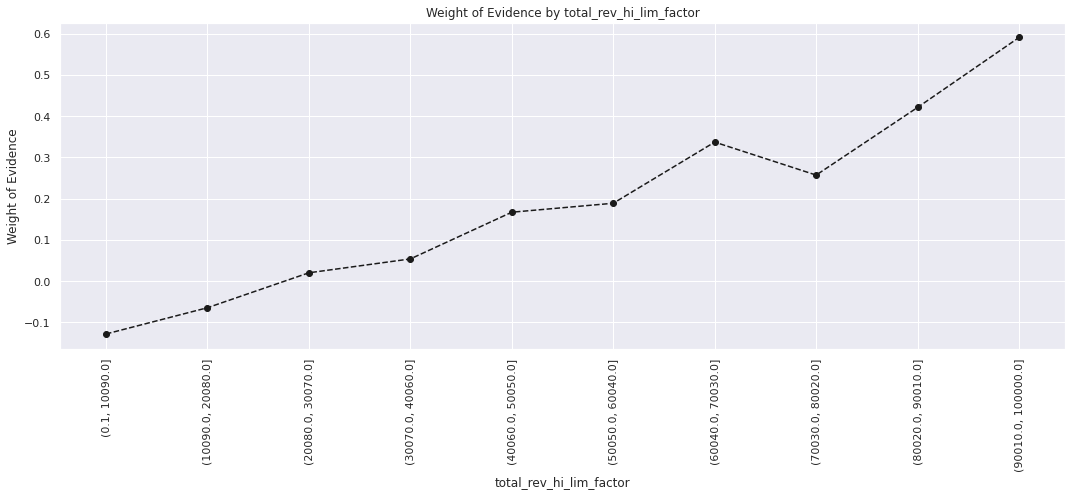

In [91]:
plot_by_woe(df_temp, 90)

In [92]:
# Analyze 'total_pymnt' WOE
X['total_pymnt_factor'] = pd.cut(X['total_pymnt'], 10)
total_pym_df = woe_continous(X, 'total_pymnt_factor', y)
total_pym_df


,total_pymnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-20.362, 5640.912]",51224,0.815594,0.268726,41778.0,9446.0,0.243311,0.499471,-0.719209,NaN,NaN,inf
1,"(5640.912, 11246.134]",66840,0.906867,0.350649,60615.0,6225.0,0.353016,0.329156,0.069982,0.091273,0.789190,inf
2,"(11246.134, 16851.356]",36825,0.941208,0.193187,34660.0,2165.0,0.201857,0.114478,0.567179,0.034341,0.497197,inf
3,"(16851.356, 22456.578]",18095,0.959271,0.094928,17358.0,737.0,0.101091,0.038970,0.953234,0.018062,0.386055,inf
4,"(22456.578, 28061.8]",9080,0.973789,0.047635,8842.0,238.0,0.051495,0.012585,1.409011,0.014518,0.455777,inf
5,"(28061.8, 33667.022]",4255,0.985429,0.022322,4193.0,62.0,0.024420,0.003278,2.008050,0.011640,0.599040,inf
6,"(33667.022, 39272.244]",2476,0.989095,0.012989,2449.0,27.0,0.014263,0.001428,2.301611,0.003666,0.293561,inf
7,"(39272.244, 44877.466]",1463,0.991798,0.007675,1451.0,12.0,0.008450,0.000635,2.589115,0.002702,0.287503,inf
8,"(44877.466, 50482.688]",308,1.000000,0.001616,308.0,0.0,0.001794,0.000000,inf,0.008202,inf,inf
9,"(50482.688, 56087.91]",52,1.000000,0.000273,52.0,0.0,0.000303,0.000000,inf,0.000000,NaN,inf


In [93]:
# Analyze 'dti' WOE
X['dti_factor'] = pd.cut(X['dti'], 10)
dti_df = woe_continous(X, 'dti_factor', y)
dti_df

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 3.999]",5364,0.929903,0.028140,4988.0,376.0,0.029050,0.019882,0.379214,NaN,NaN,0.039468
1,"(3.999, 7.998]",16957,0.922982,0.088958,15651.0,1306.0,0.091150,0.069057,0.277579,0.006921,0.101635,0.039468
2,"(7.998, 11.997]",28791,0.919558,0.151040,26475.0,2316.0,0.154188,0.122462,0.230372,0.003423,0.047206,0.039468
3,"(11.997, 15.996]",35466,0.911465,0.186058,32326.0,3140.0,0.188264,0.166032,0.125662,0.008094,0.104710,0.039468
4,"(15.996, 19.995]",34248,0.899206,0.179668,30796.0,3452.0,0.179353,0.182530,-0.017556,0.012259,0.143218,0.039468
5,"(19.995, 23.994]",28507,0.890694,0.149550,25391.0,3116.0,0.147875,0.164763,-0.108142,0.008512,0.090586,0.039468
6,"(23.994, 27.993]",20918,0.876613,0.109738,18337.0,2581.0,0.106793,0.136474,-0.245243,0.014080,0.137101,0.039468
7,"(27.993, 31.992]",12988,0.868802,0.068136,11284.0,1704.0,0.065717,0.090102,-0.315580,0.007811,0.070337,0.039468
8,"(31.992, 35.991]",6076,0.873766,0.031875,5309.0,767.0,0.030919,0.040556,-0.271315,0.004964,0.044265,0.039468
9,"(35.991, 39.99]",1303,0.881811,0.006836,1149.0,154.0,0.006692,0.008143,-0.196292,0.008046,0.075023,0.039468


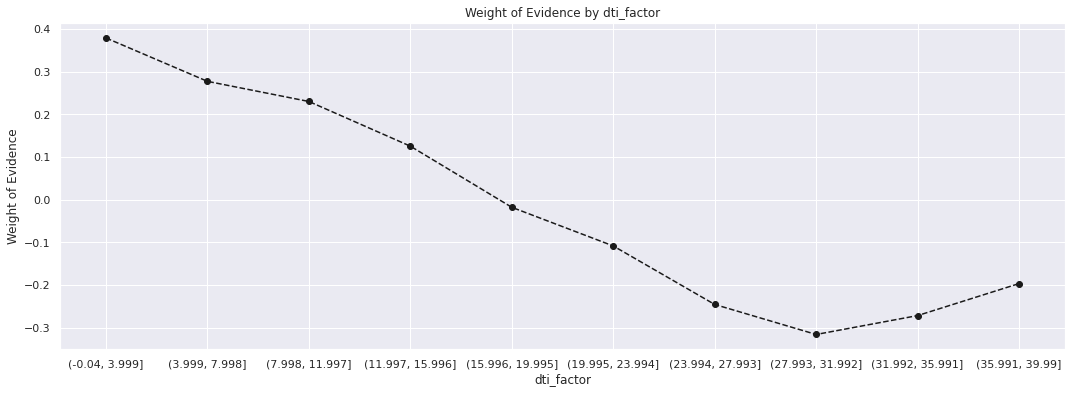

In [94]:
plot_by_woe(dti_df)

The following categories will  be combined together:
1. (27.993, 31.992), (31.992, 35.991), (35.991, 39.99)

In [95]:
# Analyze annual income WOE
X['annual_inc_factor'] = pd.cut(X['annual_inc'], 50)
ann_inc_df = woe_continous(X, 'annual_inc_factor', y)
ann_inc_df


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-4497.0, 152940.0]",180981,0.899304,0.949443,162757.0,18224.0,0.947882,0.963621,-0.016468,NaN,NaN,inf
1,"(152940.0, 302880.0]",8650,0.927168,0.045379,8020.0,630.0,0.046708,0.033312,0.337987,0.027863,0.354455,inf
2,"(302880.0, 452820.0]",685,0.934307,0.003594,640.0,45.0,0.003727,0.002379,0.448819,0.007139,0.110832,inf
3,"(452820.0, 602760.0]",180,0.966667,0.000944,174.0,6.0,0.001013,0.000317,1.161309,0.032360,0.712490,inf
4,"(602760.0, 752700.0]",44,0.931818,0.000231,41.0,3.0,0.000239,0.000159,0.408973,0.034848,0.752336,inf
5,"(752700.0, 902640.0]",34,0.911765,0.000178,31.0,3.0,0.000181,0.000159,0.129388,0.020053,0.279585,inf
6,"(902640.0, 1052580.0]",21,0.952381,0.000110,20.0,1.0,0.000116,0.000053,0.789745,0.040616,0.660357,inf
7,"(1052580.0, 1202520.0]",9,1.000000,0.000047,9.0,0.0,0.000052,0.000000,inf,0.047619,inf,inf
8,"(1202520.0, 1352460.0]",4,1.000000,0.000021,4.0,0.0,0.000023,0.000000,inf,0.000000,NaN,inf
9,"(1352460.0, 1502400.0]",1,1.000000,0.000005,1.0,0.0,0.000006,0.000000,inf,0.000000,NaN,inf


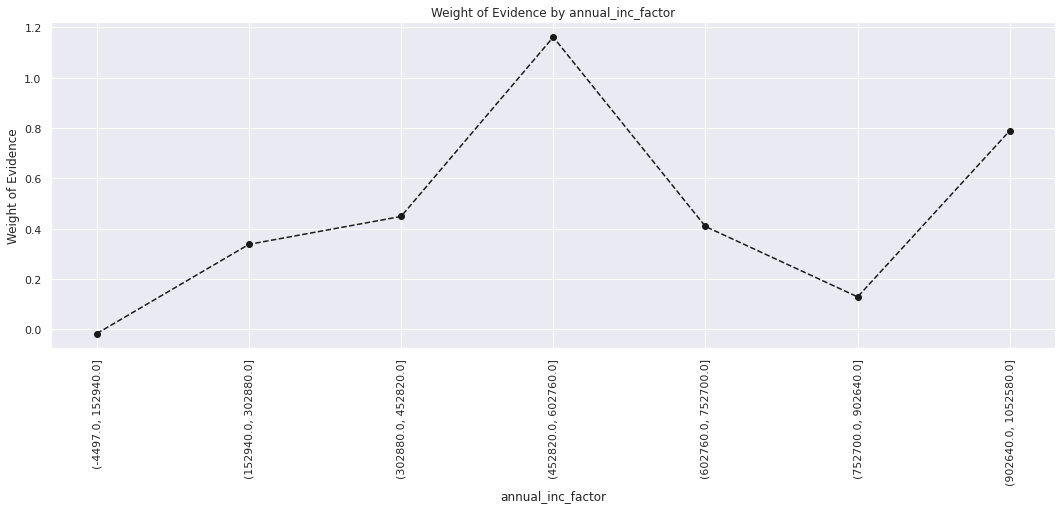

In [96]:
plot_by_woe(ann_inc_df, 90)

Separate this variable into person with higher and lower income. From the WOE table we see that as annual income increases, the the number of observations decreases. It is because only a few person earn high income. We will analyze a new variable of person with income above 150000 dollars and below 150000 dollars.

In [97]:
# Analyze income below 150000
X_train_prepr_temp = X[X['annual_inc'] <= 150000].copy()
# Fine-classing again
X_train_prepr_temp['annual_inc_factor'] = pd.cut(X_train_prepr_temp['annual_inc'], 10)
# Select only the relevant indexes in the target column
df_temp = woe_continous(X_train_prepr_temp, 'annual_inc_factor', y[X_train_prepr_temp.index])
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(2853.0, 17700.0]",762,0.866142,0.004214,660.0,102.0,0.004059,0.005602,-0.322190,NaN,NaN,0.034507
1,"(17700.0, 32400.0]",11323,0.869911,0.062623,9850.0,1473.0,0.060577,0.080899,-0.289286,0.003769,0.032903,0.034507
2,"(32400.0, 47100.0]",31737,0.882283,0.175525,28001.0,3736.0,0.172204,0.205185,-0.175232,0.012372,0.114054,0.034507
3,"(47100.0, 61800.0]",39346,0.889366,0.217607,34993.0,4353.0,0.215204,0.239071,-0.105174,0.007084,0.070058,0.034507
4,"(61800.0, 76500.0]",34081,0.901529,0.188489,30725.0,3356.0,0.188956,0.184315,0.024870,0.012163,0.130044,0.034507
5,"(76500.0, 91200.0]",24711,0.912913,0.136667,22559.0,2152.0,0.138736,0.118190,0.160280,0.011385,0.135410,0.034507
6,"(91200.0, 105900.0]",16341,0.915917,0.090376,14967.0,1374.0,0.092046,0.075461,0.198665,0.003004,0.038385,0.034507
7,"(105900.0, 120600.0]",11278,0.924011,0.062374,10421.0,857.0,0.064088,0.047067,0.308684,0.008094,0.110019,0.034507
8,"(120600.0, 135300.0]",6222,0.933944,0.034411,5811.0,411.0,0.035737,0.022572,0.459458,0.009933,0.150774,0.034507
9,"(135300.0, 150000.0]",5011,0.921373,0.027714,4617.0,394.0,0.028394,0.021639,0.271693,0.012571,0.187765,0.034507


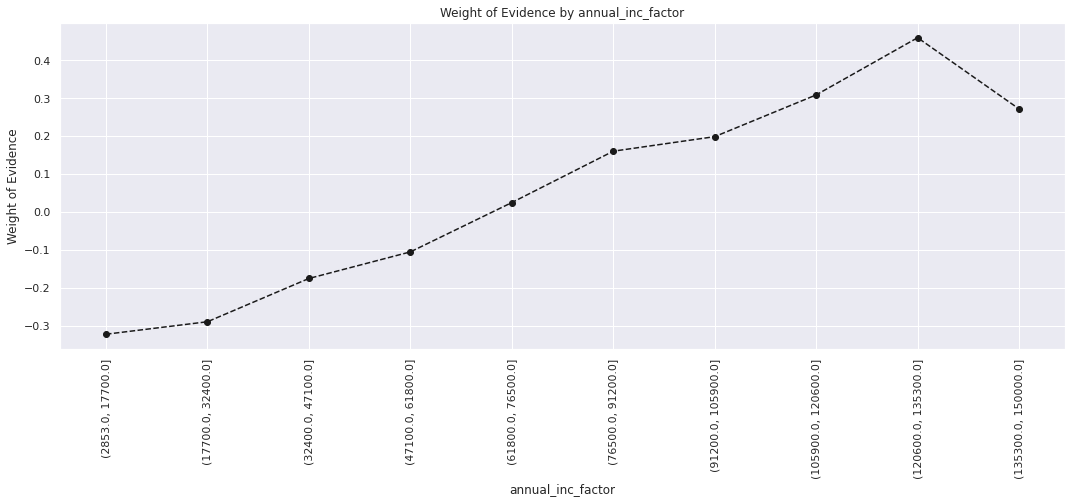

In [98]:
plot_by_woe(df_temp, 90)

We will combine the following categories based on WOE and number of observations as follows: 
 (<=32000), (>32000 <= 50000), (>50000 <= 60000), (>60000 <=75000), (>75000 <=90000), (>90000 <=120000), (>120000 <=135000), (>135000 <=150000), (>150000)



In [99]:
# Analyze 'inq_last_6mths' WOE
X['inq_last_6mths_factor'] = pd.cut(X['inq_last_6mths'], 7)
inq_fact_df = woe_continous(X, 'inq_last_6mths_factor', y)
inq_fact_df

,inq_last_6mths_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.007, 1.0]",150749,0.908623,0.790843,136974.0,13775.0,0.797724,0.728374,0.090949,NaN,NaN,inf
1,"(1.0, 2.0]",24678,0.879245,0.129463,21698.0,2980.0,0.126367,0.157572,-0.220690,0.029378,0.311639,inf
2,"(2.0, 3.0]",10396,0.858792,0.054538,8928.0,1468.0,0.051996,0.077623,-0.400696,0.020453,0.180005,inf
3,"(3.0, 4.0]",3256,0.852887,0.017081,2777.0,479.0,0.016173,0.025328,-0.448561,0.005905,0.047866,inf
4,"(4.0, 5.0]",1125,0.877333,0.005902,987.0,138.0,0.005748,0.007297,-0.238571,0.024446,0.209990,inf
5,"(5.0, 6.0]",413,0.825666,0.002167,341.0,72.0,0.001986,0.003807,-0.650771,0.051667,0.412200,inf
6,"(6.0, 7.0]",1,1.000000,0.000005,1.0,0.0,0.000006,0.000000,inf,0.174334,inf,inf


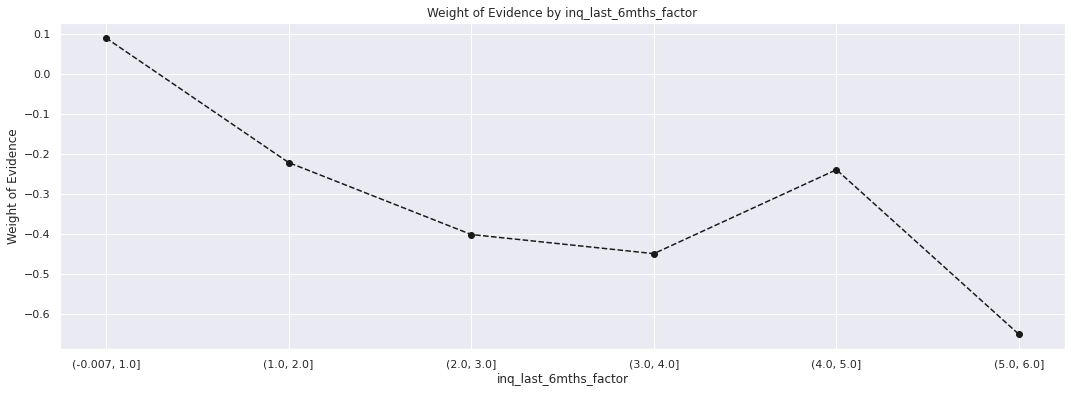

In [100]:
plot_by_woe(inq_fact_df)

The following categories will be created to new categories:
1. <1 months
2. 1-2
3. 2-4
4. 4-7

In [101]:
# Analyze total current balance WOE
X['tot_cur_bal_factor'] = pd.cut(X['tot_cur_bal'], 20)
curr_bal_df = woe_continous(X, 'tot_cur_bal_factor', y)
curr_bal_df

,tot_cur_bal_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-8000.078, 400003.9]",177910,0.898533,0.933333,159858.0,18052.0,0.930998,0.954526,-0.024958,NaN,NaN,inf
1,"(400003.9, 800007.8]",11774,0.931969,0.061768,10973.0,801.0,0.063906,0.042354,0.411345,0.033436,0.436303,inf
2,"(800007.8, 1200011.7]",741,0.933873,0.003887,692.0,49.0,0.004030,0.002591,0.441779,0.001904,0.030434,inf
3,"(1200011.7, 1600015.6]",126,0.968254,0.000661,122.0,4.0,0.000711,0.000212,1.211740,0.034381,0.769961,inf
4,"(1600015.6, 2000019.5]",33,0.848485,0.000173,28.0,5.0,0.000163,0.000264,-0.483220,0.119769,1.694960,inf
5,"(2000019.5, 2400023.4]",16,0.937500,0.000084,15.0,1.0,0.000087,0.000053,0.502063,0.089015,0.985284,inf
6,"(2400023.4, 2800027.3]",8,1.000000,0.000042,8.0,0.0,0.000047,0.000000,inf,0.062500,inf,inf
7,"(2800027.3, 3200031.2]",2,1.000000,0.000010,2.0,0.0,0.000012,0.000000,inf,0.000000,NaN,inf
8,"(3200031.2, 3600035.1]",1,1.000000,0.000005,1.0,0.0,0.000006,0.000000,inf,0.000000,NaN,inf
9,"(3600035.1, 4000039.0]",4,1.000000,0.000021,4.0,0.0,0.000023,0.000000,inf,0.000000,NaN,inf


In [102]:
# Analyze total current balance below WOE
X_train_prepr_temp = X[X['tot_cur_bal'] <= 400000].copy()
# Fine-classing again
X_train_prepr_temp['tot_cur_bal_factor'] = pd.cut(X_train_prepr_temp['tot_cur_bal'], 10)
# Select only the relevant indexes in the target column
df_temp = woe_continous(X_train_prepr_temp, 'tot_cur_bal_factor', y[X_train_prepr_temp.index])
df_temp

,tot_cur_bal_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-399.999, 39999.9]",59744,0.892290,0.335812,53309.0,6435.0,0.333479,0.356470,-0.066670,NaN,NaN,0.013696
1,"(39999.9, 79999.8]",29177,0.886966,0.164000,25879.0,3298.0,0.161888,0.182694,-0.120908,0.005325,0.054238,0.013696
2,"(79999.8, 119999.7]",15401,0.896046,0.086567,13800.0,1601.0,0.086327,0.088688,-0.026983,0.009080,0.093925,0.013696
3,"(119999.7, 159999.6]",15401,0.898383,0.086567,13836.0,1565.0,0.086552,0.086694,-0.001635,0.002338,0.025348,0.013696
4,"(159999.6, 199999.5]",15528,0.902756,0.087281,14018.0,1510.0,0.087691,0.083647,0.047209,0.004373,0.048845,0.013696
5,"(199999.5, 239999.4]",13072,0.907512,0.073476,11863.0,1209.0,0.074210,0.066973,0.102608,0.004756,0.055398,0.013696
6,"(239999.4, 279999.3]",10619,0.915246,0.059688,9719.0,900.0,0.060798,0.049856,0.198420,0.007734,0.095813,0.013696
7,"(279999.3, 319999.2]",8279,0.913637,0.046535,7564.0,715.0,0.047317,0.039608,0.177850,0.001609,0.020570,0.013696
8,"(319999.2, 359999.1]",6083,0.925530,0.034192,5630.0,453.0,0.035219,0.025094,0.338949,0.011893,0.161100,0.013696
9,"(359999.1, 399999.0]",4605,0.920521,0.025884,4239.0,366.0,0.026517,0.020275,0.268426,0.005009,0.070523,0.013696


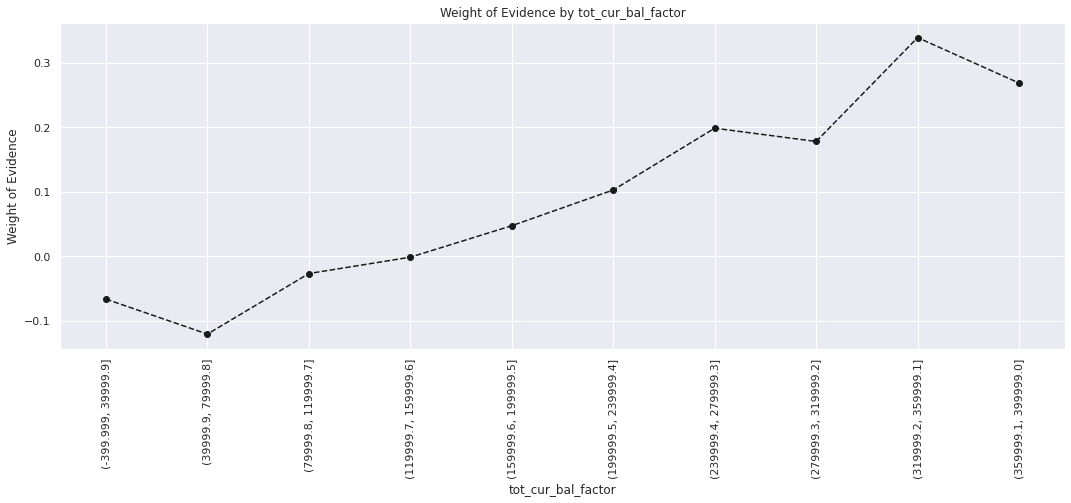

In [103]:
plot_by_woe(df_temp, 90)

The variables will be created: 
<40000
40000-80000
80000-120000
120000-160000
160000-200000
200000-240000
240000-320000
320000-400000

In [104]:
# Analyze 'mths_since_credit_pull' WOE 
X['mths_since_last_credit_pull_d_factor'] = pd.cut(X['mths_since_last_credit_pull_d'], 10)
mths_cr_pull_df = woe_continous(X, 'mths_since_last_credit_pull_d_factor', y)
mths_cr_pull_df

,mths_since_last_credit_pull_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(54.96, 59.0]",164288,0.924145,0.861870,151826.0,12462.0,0.884221,0.658947,0.294064,NaN,NaN,0.319524
1,"(59.0, 63.0]",8859,0.794446,0.046475,7038.0,1821.0,0.040989,0.096288,-0.854049,0.129699,1.148113,0.319524
2,"(63.0, 67.0]",7128,0.744248,0.037394,5305.0,1823.0,0.030896,0.096394,-1.137821,0.050198,0.283772,0.319524
3,"(67.0, 71.0]",4146,0.711047,0.021750,2948.0,1198.0,0.017169,0.063346,-1.305514,0.033201,0.167693,0.319524
4,"(71.0, 75.0]",2791,0.751702,0.014642,2098.0,693.0,0.012219,0.036643,-1.098277,0.040655,0.207236,0.319524
5,"(75.0, 79.0]",1800,0.699444,0.009443,1259.0,541.0,0.007332,0.028606,-1.361333,0.052257,0.263056,0.319524
6,"(79.0, 83.0]",897,0.711260,0.004706,638.0,259.0,0.003716,0.013695,-1.304477,0.011815,0.056856,0.319524
7,"(83.0, 87.0]",478,0.801255,0.002508,383.0,95.0,0.002231,0.005023,-0.811829,0.089995,0.492648,0.319524
8,"(87.0, 91.0]",198,0.904040,0.001039,179.0,19.0,0.001042,0.001005,0.036960,0.102785,0.848789,0.319524
9,"(91.0, 95.0]",33,0.969697,0.000173,32.0,1.0,0.000186,0.000053,1.259749,0.065657,1.222789,0.319524


In [105]:
# Analyze 'mths_since_credit_pull' below 60
X_train_prepr_temp = X[X['mths_since_last_credit_pull_d'] <= 60].copy()
# Fine-classing again
X_train_prepr_temp['mths_since_last_credit_pull_d'] = pd.cut(X_train_prepr_temp['mths_since_last_credit_pull_d'], 5)
# Select only the relevant indexes in the target column
df_temp = woe_continous(X_train_prepr_temp, 'mths_since_last_credit_pull_d', y[X_train_prepr_temp.index])
df_temp

,mths_since_last_credit_pull_d,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(54.995, 56.0]",154850,0.923061,0.929215,142936.0,11914.0,0.929828,0.921922,0.008539,NaN,NaN,0.10623
1,"(56.0, 57.0]",3361,0.989884,0.020169,3327.0,34.0,0.021643,0.002631,2.107322,0.066823,2.098783,0.10623
2,"(57.0, 58.0]",3033,0.984504,0.018200,2986.0,47.0,0.019425,0.003637,1.675399,0.005380,0.431923,0.10623
3,"(58.0, 59.0]",3044,0.846583,0.018266,2577.0,467.0,0.016764,0.036137,-0.768092,0.137920,2.443490,0.10623
4,"(59.0, 60.0]",2358,0.804495,0.014150,1897.0,461.0,0.012340,0.035673,-1.061513,0.042088,0.293421,0.10623


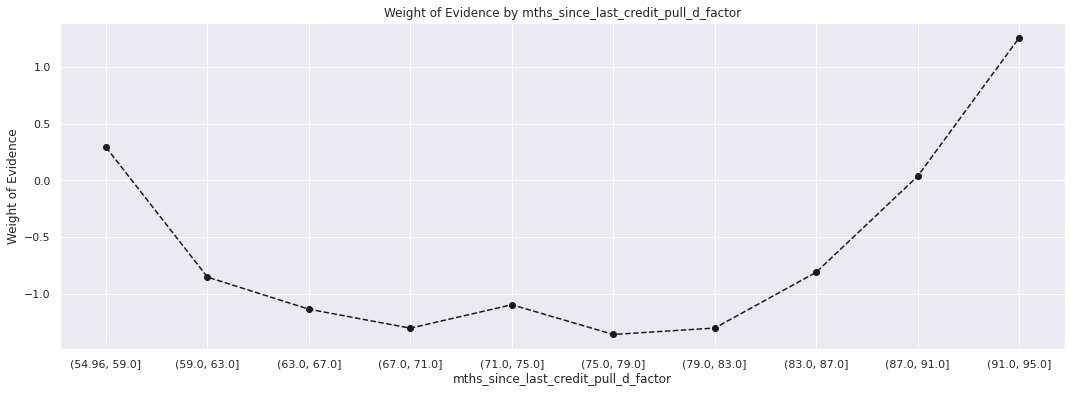

In [106]:
plot_by_woe(mths_cr_pull_df)

The following categories will be grouped together: 54-65, 65-76, greater than 76

> Indented block

> Indented block

> Indented block







In [108]:
# Analyze 'out_prncp' WOE 
X['out_prncp_factor'] = pd.cut(X['out_prncp'], 10)
out_df = woe_continous(X, 'out_prncp_factor', y)
out_df

,out_prncp_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-31.899, 3189.877]",101058,0.846187,0.530160,85514.0,15544.0,0.498026,0.821912,-0.500982,NaN,NaN,0.508571
1,"(3189.877, 6379.754]",26772,0.967914,0.140448,25913.0,859.0,0.150915,0.045421,1.200744,0.121727,1.701726,0.508571
2,"(6379.754, 9569.631]",19894,0.965366,0.104366,19205.0,689.0,0.111848,0.036432,1.121698,0.002548,0.079046,0.508571
3,"(9569.631, 12759.508]",15769,0.962268,0.082726,15174.0,595.0,0.088372,0.031462,1.032790,0.003099,0.088907,0.508571
4,"(12759.508, 15949.385]",10038,0.960251,0.052660,9639.0,399.0,0.056137,0.021098,0.978624,0.002017,0.054166,0.508571
5,"(15949.385, 19139.262]",6988,0.955638,0.036660,6678.0,310.0,0.038892,0.016392,0.864014,0.004613,0.114610,0.508571
6,"(19139.262, 22329.139]",4765,0.952571,0.024998,4539.0,226.0,0.026435,0.011950,0.793940,0.003067,0.070075,0.508571
7,"(22329.139, 25519.016]",2943,0.953449,0.015439,2806.0,137.0,0.016342,0.007244,0.813547,0.000878,0.019607,0.508571
8,"(25519.016, 28708.893]",1687,0.950207,0.008850,1603.0,84.0,0.009336,0.004442,0.742828,0.003241,0.070719,0.508571
9,"(28708.893, 31898.77]",704,0.901989,0.003693,635.0,69.0,0.003698,0.003648,0.013531,0.048219,0.729297,0.508571


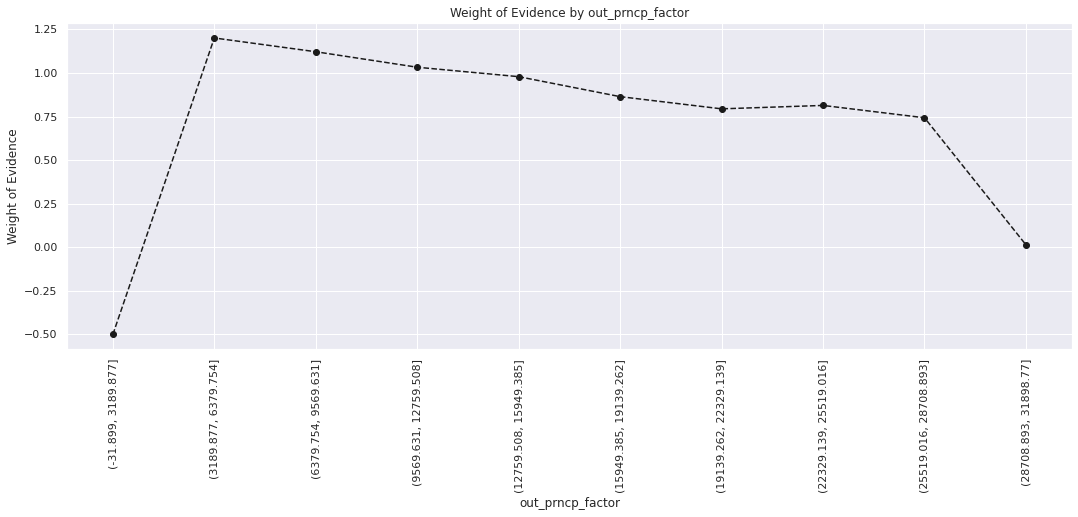

In [109]:
plot_by_woe(out_df, 90)

In [110]:
# Analyze 'mths_since_issue_date' WOE 
X['mths_since_issue_d'] = pd.cut(X['mths_since_issue_d'], 10)
iss_df = woe_continous(X, 'mths_since_issue_d', y)
iss_df

,mths_since_issue_d,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(67.972, 70.8]",38563,0.937194,0.202305,36141.0,2422.0,0.210482,0.128067,0.496847,NaN,NaN,0.086058
1,"(70.8, 73.6]",29359,0.916278,0.154020,26901.0,2458.0,0.156669,0.129970,0.186828,0.020916,0.310019,0.086058
2,"(73.6, 76.4]",27608,0.905716,0.144834,25005.0,2603.0,0.145627,0.137637,0.056424,0.010562,0.130404,0.086058
3,"(76.4, 79.2]",24062,0.898845,0.126232,21628.0,2434.0,0.125959,0.128701,-0.021534,0.006871,0.077958,0.086058
4,"(79.2, 82.0]",20400,0.891324,0.107020,18183.0,2217.0,0.105896,0.117227,-0.101655,0.007521,0.080121,0.086058
5,"(82.0, 84.8]",11198,0.884712,0.058746,9907.0,1291.0,0.057697,0.068264,-0.168163,0.006612,0.066508,0.086058
6,"(84.8, 87.6]",14263,0.866718,0.074825,12362.0,1901.0,0.071995,0.100518,-0.333740,0.017993,0.165577,0.086058
7,"(87.6, 90.4]",9643,0.866743,0.050588,8358.0,1285.0,0.048676,0.067946,-0.333527,0.000025,0.000213,0.086058
8,"(90.4, 93.2]",10587,0.856522,0.055540,9068.0,1519.0,0.052811,0.080319,-0.419288,0.010221,0.085761,0.086058
9,"(93.2, 96.0]",4935,0.841540,0.025889,4153.0,782.0,0.024187,0.041349,-0.536256,0.014982,0.116968,0.086058


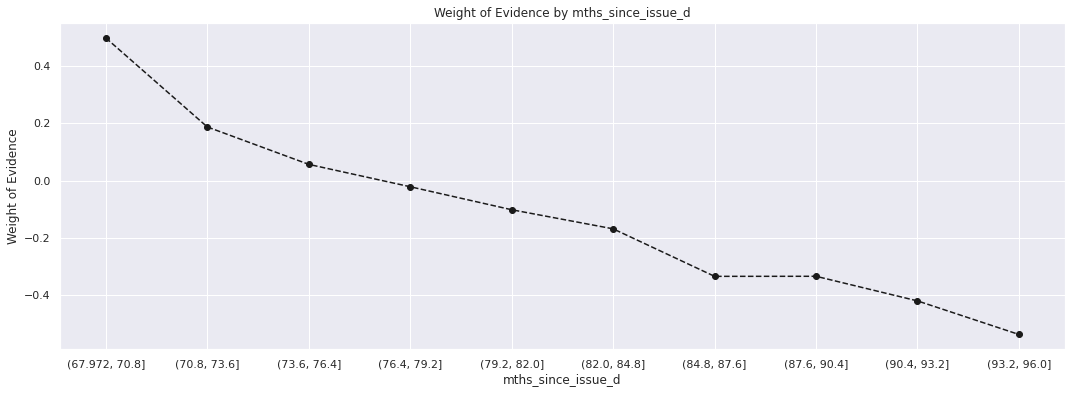

In [114]:
plot_by_woe(iss_df)

### Creating  new features based on WOE

In [117]:
# Create a new dataframe and start with 'grade' variable

new_df = preprocess_data.loc[:, 'grade:A':'grade:G']

KeyError: ignored

In [116]:
new_df.head()

NameError: ignored

In [ ]:
# home_ownership 

new_df['home_ownership:OWN'] = preprocess_data.loc[:, 'home_ownership:OWN']
new_df['home_ownership:OTHER_NONE_RENT_ANY'] = sum([preprocess_data['home_ownership:OTHER'], preprocess_data['home_ownership:NONE'],
                                                 preprocess_data['home_ownership:RENT'], preprocess_data['home_ownership:ANY']])
new_df['home_ownership:MORTGAGE'] = preprocess_data.loc[:, 'home_ownership:MORTGAGE']

# verification_status
new_df['verification_status:NOT_VERIFIED'] = preprocess_data.loc[:, 'verification_status:Not Verified']
new_df['verification_status:SOURCE_VERIFIED'] = preprocess_data.loc[:, 'verification_status:Source Verified']
new_df['verification_status:VERIFIED'] = preprocess_data.loc[:, 'verification_status:Verified']

# purpose of loan
new_df['purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING'] = sum([preprocess_data['purpose:small_business'],  preprocess_data['purpose:renewable_energy'], preprocess_data['purpose:moving']])

new_df['purpose:OTHER_HOUSE_MEDICAL'] =sum([preprocess_data['purpose:other'], preprocess_data['purpose:house'], preprocess_data['purpose:medical']])
new_df ['purpose:WEDDING_VACATION'] = sum([preprocess_data['purpose:wedding'], preprocess_data['purpose:vacation']])
new_df ['purpose:HOME_IMPROVEMENT_MAJOR_PURCHASE'] = sum([preprocess_data['purpose:home_improvement'], preprocess_data['purpose:major_purchase']])
new_df ['purpose:CAR_CREDIT_CARD'] = sum([preprocess_data['purpose:car'], preprocess_data['purpose:credit_card']])


# addr_state
new_df['addr_state:NE_IA_NV_HI_FL_AL'] =sum([preprocess_data['addr_state:IA'],preprocess_data['addr_state:NV'],
                                           preprocess_data['addr_state:HI'],preprocess_data['addr_state:FL'],preprocess_data['addr_state:AL']])
new_df['addr_state:NY'] = preprocess_data.loc[:, 'addr_state:NY']
new_df['addr_state:LA_NM_OK_NC_MO_MD_NJ_VA'] = sum([preprocess_data['addr_state:LA'],preprocess_data['addr_state:NM'],preprocess_data['addr_state:OK'],
                     preprocess_data['addr_state:NC'],preprocess_data['addr_state:MO'],preprocess_data['addr_state:MD'], preprocess_data['addr_state:NJ'],
                                                  preprocess_data['addr_state:VA']])
new_df['addr_state:CA'] = preprocess_data.loc[:,'addr_state:CA']
new_df['addr_state:AZ_MI_UT_TN_AR_PA'] =sum([preprocess_data['addr_state:AZ'],preprocess_data['addr_state:MI'],preprocess_data['addr_state:UT'],
preprocess_data['addr_state:TN'],preprocess_data['addr_state:AR'],preprocess_data['addr_state:PA']])

new_df['addr_state:RI_OH_KY_DE_MN_SD_MA_IN'] =sum([preprocess_data['addr_state:RI'],preprocess_data['addr_state:OH'],preprocess_data['addr_state:KY'],
 preprocess_data['addr_state:DE'],preprocess_data['addr_state:MN'],preprocess_data['addr_state:SD'],preprocess_data['addr_state:MA'],
                    preprocess_data['addr_state:IN']])

new_df['addr_state:GA_WA'] = sum([preprocess_data['addr_state:GA'], preprocess_data['addr_state:WA']])
new_df['addr_state:WI_OR'] = sum([preprocess_data['addr_state:WI'], preprocess_data['addr_state:OR']])
new_df['addr_state:TX'] = preprocess_data.loc[:,'addr_state:TX']
new_df['addr_state:IL_CT_MT'] =sum([preprocess_data['addr_state:IL'],preprocess_data['addr_state:CT'],preprocess_data['addr_state:MT']])
new_df['addr_state:CO_SC'] = sum([preprocess_data['addr_state:CO'], preprocess_data['addr_state:SC']])
new_df['addr_state:KS_VT_AK_NS'] =sum([preprocess_data['addr_state:KS'],preprocess_data['addr_state:VT'],preprocess_data['addr_state:AK'],
                                           preprocess_data['addr_state:MS']])
new_df['addr_state:NH_WV_WY_DC'] =sum([preprocess_data['addr_state:NH'],preprocess_data['addr_state:WV'],preprocess_data['addr_state:WY'],
                                           preprocess_data['addr_state:DC']])
# initial_list_status
new_df['initial_list_status:F'] = preprocess_data.loc[:, 'initial_list_status:f']
new_df['initial_list_status:W'] = preprocess_data.loc[:, 'initial_list_status:w']

# term 
new_df['term:36'] = np.where((preprocess_data['term'] == 36), 1, 0)
new_df['term:60'] = np.where((preprocess_data['term']==60), 1,0)

# total_rec_int 
new_df['total_rec_int:<1000'] = np.where((preprocess_data['total_rec_int']<=1000), 1,0)
new_df['total_rec_int:1000-2000'] = np.where((preprocess_data['total_rec_int']>1000) &(preprocess_data['total_rec_int']<=2000), 1,0)
new_df['total_rec_int:2000-9000'] = np.where((preprocess_data['total_rec_int']>2000) &(preprocess_data['total_rec_int']<=9000), 1,0)
new_df['total_rec_int:>9000'] = np.where((preprocess_data['total_rec_int']>9000), 1,0)


# total_revol_hi_lim
new_df['total_rev_hi_lim:<10000'] =np.where((preprocess_data['total_rev_hi_lim']<=10000),1,0)
new_df['total_rev_hi_lim:10000-20000'] =np.where((preprocess_data['total_rev_hi_lim']>10000)&(preprocess_data['total_rev_hi_lim']<=20000),1,0)
new_df['total_rev_hi_lim:20000-40000'] =np.where((preprocess_data['total_rev_hi_lim']>20000)&(preprocess_data['total_rev_hi_lim']<=40000),1,0)
new_df['total_rev_hi_lim:40000-60000'] =np.where((preprocess_data['total_rev_hi_lim']>40000)&(preprocess_data['total_rev_hi_lim']<=60000),1,0)
new_df['total_rev_hi_lim:60000-80000'] =np.where((preprocess_data['total_rev_hi_lim']>60000)&(preprocess_data['total_rev_hi_lim']<=80000),1,0)
new_df['total_rev_hi_lim:80000-100000'] =np.where((preprocess_data['total_rev_hi_lim']>80000)&(preprocess_data['total_rev_hi_lim']<=100000),1,0)
new_df['total_rev_hi_lim:<100000'] =np.where((preprocess_data['total_rev_hi_lim']>100000),1,0)


# total_pymnt
new_df['total_pymnt:<5000'] = np.where((preprocess_data['total_pymnt']<=5000), 1,0)
new_df['total_pymnt:5000-11000'] = np.where((preprocess_data['total_pymnt']>5000)&(preprocess_data['total_pymnt']<=11000),1,0)
new_df['total_pymnt:11000-16000'] = np.where((preprocess_data['total_pymnt']>11000)&(preprocess_data['total_pymnt']<=16000),1,0)
new_df['total_pymnt:16000-22000'] = np.where((preprocess_data['total_pymnt']>16000)&(preprocess_data['total_pymnt']<=22000),1,0)
new_df['total_pymnt:>22000'] = np.where((preprocess_data['total_pymnt']<=5000), 1,0)
#int_Rate

new_df['int_rate:<7.484'] = np.where((preprocess_data['int_rate'] <= 7.484), 1, 0)
new_df['int_rate:7.484-9.548'] = np.where((preprocess_data['int_rate'] > 7.484) & (preprocess_data['int_rate'] <= 9.548), 1, 0)
new_df['int_rate:9.548-11.612'] = np.where((preprocess_data['int_rate'] > 9.548) & (preprocess_data['int_rate'] <= 11.612), 1, 0)
new_df['int_rate:11.612-13.676'] = np.where((preprocess_data['int_rate'] > 11.612) & (preprocess_data['int_rate'] <= 13.676), 1, 0)
new_df['int_rate:13.676-15.74'] = np.where((preprocess_data['int_rate'] > 13.676) & (preprocess_data['int_rate'] <= 15.74), 1, 0)
new_df['int_rate:15.74-17.804'] = np.where((preprocess_data['int_rate'] > 15.74) & (preprocess_data['int_rate'] <= 17.804), 1, 0)
new_df['int_rate:17.804-19.868'] = np.where((preprocess_data['int_rate'] > 17.804) & (preprocess_data['int_rate'] <= 19.868), 1, 0)
new_df['int_rate:7.19.868-21.932'] = np.where((preprocess_data['int_rate'] > 19.868) & (preprocess_data['int_rate'] <= 21.932), 1, 0)
new_df['int_rate:21.932-26.06'] = np.where((preprocess_data['int_rate'] > 21.932) & (preprocess_data['int_rate'] <= 26.06), 1, 0)


# dti 
new_df['dti:<4'] = np.where((preprocess_data['dti'] <=4), 1, 0)
new_df['dti:4-8'] = np.where((preprocess_data['dti'] > 4) & (preprocess_data['dti'] <= 8), 1, 0)
new_df['dti:8-12'] = np.where((preprocess_data['dti'] > 8) & (preprocess_data['dti'] <= 12), 1, 0)
new_df['dti:12-16'] = np.where((preprocess_data['dti'] > 12) & (preprocess_data['dti'] <= 16), 1, 0)
new_df['dti:16-20'] = np.where((preprocess_data['dti'] > 16) & (preprocess_data['dti'] <= 20), 1, 0)
new_df['dti:20-23'] = np.where((preprocess_data['dti'] > 20) & (preprocess_data['dti'] <= 23), 1, 0)
new_df['dti:23-27'] = np.where((preprocess_data['dti'] > 23) & (preprocess_data['dti'] <= 27), 1, 0)
new_df['dti:27-40'] = np.where((preprocess_data['dti'] > 27) & (preprocess_data['dti'] <= 40), 1, 0)

# annual income 
new_df['annual_inc:<32000'] = np.where((preprocess_data['annual_inc'] <= 32000), 1, 0)
new_df['annual_inc:32000-50000'] = np.where((preprocess_data['annual_inc'] > 32000) & (preprocess_data['annual_inc'] <= 50000),1, 0)
new_df['annual_inc:32000-50000'] = np.where((preprocess_data['annual_inc'] > 32000) & (preprocess_data['annual_inc'] <= 50000), 1, 0)
new_df['annual_inc:50000-60000'] = np.where((preprocess_data['annual_inc'] > 50000) & (preprocess_data['annual_inc'] <= 60000), 1, 0)
new_df['annual_inc:60000-75000'] = np.where((preprocess_data['annual_inc'] > 60000) & (preprocess_data['annual_inc'] <= 75000), 1, 0)
new_df['annual_inc:75000-90000'] = np.where((preprocess_data['annual_inc'] > 75000) & (preprocess_data['annual_inc'] <= 90000), 1, 0)
new_df['annual_inc:90000-120000'] = np.where((preprocess_data['annual_inc'] > 90000) & (preprocess_data['annual_inc'] <= 120000), 1, 0)
new_df['annual_inc:120000-135000'] = np.where((preprocess_data['annual_inc'] > 120000) & (preprocess_data['annual_inc'] <= 135000), 1, 0)
new_df['annual_inc:135000-150000'] = np.where((preprocess_data['annual_inc'] > 135000) & (preprocess_data['annual_inc'] <= 150000), 1, 0)
new_df['annual_inc:>150000'] = np.where((preprocess_data['annual_inc'] > 150000), 1, 0)

# inq_last_6mths
new_df['inq_last_6mths:<1'] = np.where((preprocess_data['inq_last_6mths'] <=1), 1, 0)
new_df['inq_last_6mths:1-2'] = np.where((preprocess_data['inq_last_6mths'] >1)& (preprocess_data['inq_last_6mths']<=2),  1, 0)
new_df['inq_last_6mths:2-4'] = np.where((preprocess_data['inq_last_6mths'] >2)& (preprocess_data['inq_last_6mths']<=4),  1, 0)
new_df['inq_last_6mths:4-7'] = np.where((preprocess_data['inq_last_6mths'] >4)& (preprocess_data['inq_last_6mths']<=7),  1, 0)

# revol_util
# new_df['revol_util:<44'] = np.where((preprocess_data['revol_util'] <=44), 1,0)
# new_df['revol_util:44-89'] =np.where((preprocess_data['revol_util'] > 44) & (preprocess_data['revol_util'] <= 89),1, 0)
# new_df['revol_util:>89'] = np.where((preprocess_data['revol_util'] >89), 1,0)

# tot_cur_balance
new_df['tot_cur_bal:<40000'] = np.where((preprocess_data['tot_cur_bal'] <= 40000), 1, 0)
new_df['tot_cur_bal:40000-80000'] = np.where((preprocess_data['tot_cur_bal'] > 40000) & (preprocess_data['tot_cur_bal'] <= 80000), 1, 0)
new_df['tot_cur_bal:80000-120000'] = np.where((preprocess_data['tot_cur_bal'] > 120000) & (preprocess_data['tot_cur_bal'] <= 160000), 1, 0)
new_df['tot_cur_bal:120000-160000'] = np.where((preprocess_data['tot_cur_bal'] > 120000) & (preprocess_data['tot_cur_bal'] <= 160000), 1, 0)
new_df['tot_cur_bal:160000-200000'] = np.where((preprocess_data['tot_cur_bal'] > 160000) & (preprocess_data['tot_cur_bal'] <= 200000), 1, 0)
new_df['tot_cur_bal:200000-240000'] = np.where((preprocess_data['tot_cur_bal'] > 200000) & (preprocess_data['tot_cur_bal'] <= 240000), 1, 0)
new_df['tot_cur_bal:240000-320000'] = np.where((preprocess_data['tot_cur_bal'] > 240000) & (preprocess_data['tot_cur_bal'] <= 320000), 1, 0)
new_df['tot_cur_bal:320000-400000'] = np.where((preprocess_data['tot_cur_bal'] > 320000) & (preprocess_data['tot_cur_bal'] <= 400000), 1, 0)
new_df['tot_cur_bal:>400000'] = np.where((preprocess_data['tot_cur_bal'] > 400000), 1, 0)

# mths_since_last_credit_pull_d
new_df['mths_since_last_credit_pull_d:<65'] = np.where((preprocess_data['mths_since_last_credit_pull_d']<=65), 1,0)
new_df['mths_since_last_credit_pull_d:65-76'] = np.where((preprocess_data['mths_since_last_credit_pull_d']>65)&(preprocess_data['mths_since_last_credit_pull_d']<=76),1,0)
new_df['mths_since_last_credit_pull_d:>76'] = np.where((preprocess_data['mths_since_last_credit_pull_d']>76), 1,0)

# mths_since_issue_d_factor
new_df['mths_since_issue_d_:<70.8'] = np.where((preprocess_data['mths_since_issue_d']<=70.8), 1,0)
new_df['mths_since_issue_d_:>70.8-73.6'] = np.where((preprocess_data['mths_since_issue_d'] >70.8) & (preprocess_data['mths_since_issue_d']<=73.6), 1,0)
new_df['mths_since_issue_d_:73.6-76.4'] = np.where((preprocess_data['mths_since_issue_d']>70.8) & (preprocess_data['mths_since_issue_d']<=76.4), 1,0)
new_df['mths_since_issue_d_:>76.4-79.2'] = np.where((preprocess_data['mths_since_issue_d'] >76.4) & (preprocess_data['mths_since_issue_d']<=79.2), 1,0)
new_df['mths_since_issue_d_:>79.2-82'] = np.where((preprocess_data['mths_since_issue_d'] >79.2) & (preprocess_data['mths_since_issue_d']<=82), 1,0)
new_df['mths_since_issue_d_>82-84'] = np.where((preprocess_data['mths_since_issue_d'] >82) & (preprocess_data['mths_since_issue_d']<=84), 1,0)
new_df['mths_since_issue_d_:>84-90.4'] = np.where((preprocess_data['mths_since_issue_d'] >84) & (preprocess_data['mths_since_issue_d']<=90.4), 1,0)
new_df['mths_since_issue_d_:>90.4-96'] = np.where((preprocess_data['mths_since_issue_d'] >90.4) & (preprocess_data['mths_since_issue_d']<=96), 1,0)

new_df['out_prncp:<3000'] = np.where((preprocess_data['out_prncp']<=3000), 1,0)
new_df['out_prncp:3000-6000'] = np.where((preprocess_data['out_prncp']>3000)&(preprocess_data['out_prncp']<=6000), 1,0)
new_df['out_prncp:6000-10000'] = np.where((preprocess_data['out_prncp']>6000)&(preprocess_data['out_prncp']<=10000), 1,0)
new_df['out_prncp:10000-12000'] = np.where((preprocess_data['out_prncp']>10000)&(preprocess_data['out_prncp']<=12000), 1,0)
new_df['out_prncp:>12000'] = np.where((preprocess_data['out_prncp']>12000), 1,0)



new_df['good_bad'] = preprocess_data.loc[:, 'good_bad']



In [ ]:
# Display first 10 rows of new_df
pd.options.display.max_columns = None
new_df.head(10)


In [ ]:
new_df.shape

In [ ]:
new_df1 = new_df

Remove one dummy variable for each original variable, otherwise we will go into the dummy variable trap. The dummy variables with the lowest WOE will be removed.

In [ ]:
# Dummy categories dropped
ref_categories = ['home_ownership:OTHER_NONE_RENT_ANY', 'total_rec_int:<1000', 'total_pymnt:<5000','total_rev_hi_lim:<10000', 'grade:G', 'verification_status:VERIFIED', 'purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING',
                 'addr_state:NE_IA_NV_HI_FL_AL', 'initial_list_status:F', 'term:60', 'mths_since_issue_d_:>90.4-96','int_rate:21.932-26.06', 'dti:27-40',
                  'annual_inc:<32000', 'inq_last_6mths:4-7', 'tot_cur_bal:<40000', 'mths_since_last_credit_pull_d:>76', 'out_prncp:>12000']

In [ ]:
new_df.drop(columns=ref_categories, inplace=True, axis=1)

In [ ]:
new_df.shape

In [ ]:
# Check the class labels are balanced

from yellowbrick.target import ClassBalance
X= new_df.drop(columns='good_bad', axis=1)
y = new_df['good_bad']
visualizer = ClassBalance()
visualizer.fit(y)
visualizer.show()

Based on graph we see that individuals who are classified as a bad borrowers have very few observations. This class imbalance can affect our model when it turns to training test. To solve this problem we will oversample the minority class.

In [ ]:
# Split data into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Check imbalance data for training dataset
y_train.value_counts()

### Import Libraries for Train Test Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

In [ ]:
# Deal with imbalance data
os = RandomOverSampler()
X_train_o, y_train_o = os.fit_resample(X_train, y_train)
y_train_series = pd.Series(y_train_o)

In [ ]:
# Check value counts after oversampling
y_train_series.value_counts()

In [ ]:
# Build the model
model = LogisticRegression()
model.fit(X_train_o, y_train_o)

In [ ]:
# Predict the model
y_preds = model.predict(X_test)

In [ ]:
# Classification report
print(classification_report(y_test, y_preds))

In [ ]:
y_hat_test_proba = model.predict_proba(X_test)
y_hat_test_proba = y_hat_test_proba[:][: , 1]
y_test_temp = y_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba), pd.DataFrame(y_preds)], axis = 1)
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba', 'y_hat_test']
y_test_proba.index = X_test.index
y_test_proba.head()

In [ ]:
# Extract the values required to plot a ROC curve
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# Plot the ROC curve
plt.plot(fpr, tpr)
# Plot a secondary diagonal line, to show randomness of model
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

In [ ]:
# Area under receiver operating charateristic curve (AUROC)
AUROC = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
AUROC

In [ ]:
Gini = AUROC * 2 - 1
Gini

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
# Plot a PR curve
# Calculate no_skill line as the proportion of the positive class
no_skill = len(y_test[y_test == 1]) / len(y)
# {lot the no_skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# Calculate inputs for the PR curve
precision, recall, thresholds = precision_recall_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# Plot PR curve
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR curve');

In [ ]:
# Precision recall score
auc_pr = auc(recall, precision)
auc_pr

In [ ]:
# Calculate ks statistic
actual_predicted_probs_df = y_test_proba.sort_values('y_hat_test_proba')

In [ ]:
actual_predicted_probs_df.head()

In [ ]:
actual_predicted_probs_df.tail()

In [ ]:
actual_predicted_probs_df = actual_predicted_probs_df.reset_index()

In [ ]:
actual_predicted_probs_df['cum_n_pop'] = actual_predicted_probs_df.index +1
actual_predicted_probs_df['cum_good'] = actual_predicted_probs_df['y_test_class_actual'].cumsum()
actual_predicted_probs_df['cum_bad'] = actual_predicted_probs_df['cum_n_pop'] - actual_predicted_probs_df['y_test_class_actual'].cumsum()


In [ ]:
actual_predicted_probs_df.head()

In [ ]:
actual_predicted_probs_df['cum_n_%'] = actual_predicted_probs_df['cum_n_pop']/(actual_predicted_probs_df.shape[0])
actual_predicted_probs_df['cum_good_%'] = actual_predicted_probs_df['cum_good']/actual_predicted_probs_df['y_test_class_actual'].sum()
actual_predicted_probs_df['cum_bad_%'] = actual_predicted_probs_df['cum_bad']/ (actual_predicted_probs_df.shape[0]-actual_predicted_probs_df['y_test_class_actual'].sum())

In [ ]:
actual_predicted_probs_df.head()

In [ ]:
plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_bad_%'])
plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_n_%'], linestyle='--', c='k')

In [ ]:
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_bad_%'], c='r')
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_good_%'], c='g')


In [ ]:
ks = max(actual_predicted_probs_df['cum_bad_%'] - actual_predicted_probs_df['cum_good_%'])
print('The KS score is ',ks)

## **Model Deployment**

In [465]:
# Save the model 
import pickle
filename = 'credit_risk_model.sav'
pickle.dump(model, open(filename, 'wb'))
